<a href="https://colab.research.google.com/github/ChiefRz/tanah-longsor/blob/main/DTS_Proyek_Analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis : Riwayat Kejadian Bencana Tanah Longsor
Rheyza Avta Naufaldy

## Menentukan Pertanyaan Bisnis

- Bagaimana tren kejadian bencana tanah longsor ?
- Bagaimana pengaruh musim terhadap kejadian bencana tanah longsor?
- Bagaimana proporsi saluran pelaporan kejadian bencana tanah longsor?
- Bagaimana persebaran kejadian bencana tanah longsor pada setiap kecamatan?

## Import Semua Packages/Library yang Digunakan

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pyproj
from babel.numbers import format_currency
from dateutil import parser
from datetime import datetime

## Data Wrangling

### Gathering Data

In [3]:
df_rekap21 = pd.read_csv("/content/drive/MyDrive/TSA-DataScience/Dataset/Peta/Rekap Bencana Tahun 2021.xlsx - DATA BENCANA DETAIL.csv")
df_rekap21.head(10)

,DATA BENCANA,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,BPBD KABUPATEN SEMARANG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TAHUN 2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NO,JENIS BENCANA,TANGGAL KEJADIAN,WAKTU KEJADIAN,KK,JIWA,NAMA PEMILIK,PELAPOR/SURAT,ALAMAT,NaN,KRONOLOGI,DAMPAK BENCANA,KERUGIAN,KET,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desa,Kecamatan,NaN,NaN,NaN,NaN,NaN
5,1,2,3,4,5,6,7,8,9,10,11,12,13,14,NaN
6,JANUARI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,ANGIN PUTING BELIUNG,01 Januari 2021,12.30 WIB,1,2,BAPAK SUTIMAN,WA GROUP /BABIN KAMTIBNAS BERGAS,RT 04/07 Dusun Pluwang Desa wringinputih kec b...,BERGAS,akibat hujan lebat mengakibatkan mengakibatkan...,-Korban (Bpk Sutiman ) mengalami luka di bagia...,10.000.000,cek lokasi dan bantuan logistik keluarga,NaN
8,2,TANAH LONGSOR,01 Januari 2021,16.35 WIB,0,0,-,WA GROUP ( KADES POLOSIRI ),Dusun Tapen RT 15 RW 05 Desa Polosiri,BAWEN,sehabis hujan pukul 16.30 terjadi gerakan tan...,Longsoran menutupi akses jalan warga,-,dilakukan evakuasi dengan petugas BPBD menggun...,NaN
9,3,TANAH LONGSOR,03 Januari 2021,14.20 WIB,0,0,-,WA GRUP,"RT 29, RW 06, Dusun Tanubayu Desa Duren",BANDUNGAN,akibat hujan lebat mengakibatkan tanah di samp...,material longsor mengenai teras rumah,-,assesmen dan pengecekan lokasi,NaN


In [4]:
df_rekap22 = pd.read_csv("/content/drive/MyDrive/TSA-DataScience/Dataset/Peta/REKAP BENCANA 2022.xlsx - Sheet1.csv")
df_rekap22.head(10)

,DATA BENCANA,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,KABUPATEN SEMARANG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JANUARI TAHUN 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NO,JENIS BENCANA,TANGGAL KEJADIAN,NAMA PEMILIK,WAKTU KEJADIAN,KK,JIWA,PELAPOR,ALAMAT,NaN,KRONOLOGI,DAMPAK BENCANA,KERUGIAN,KET,DOKUMENTASI
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DESA,KECAMATAN,NaN,NaN,NaN,NaN,NaN
5,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
6,1,LAIN - LAIN,"Saturday, January 1, 2022",NaN,"16,52",NaN,NaN,Surat dari kecamatan Bringin No: 364/024,Dusun Gemah Desa Pakis,BRINGIN,Hujan deras yang terjadi terus menerus di wila...,luapan mengenai rumah warga sekitar saluran ir...,NaN,NaN,NaN
7,2,LAIN - LAIN,"Monday, January 3, 2022",NaN,NaN,NaN,NaN,WA GRUP,"Perumahan Bayangkara, Kelurahan Susukan RT 06 ...",UNGARAN BARAT,Talud ambrol tertutup longsoran,"longsoran menimpa rumah bapak yadi, terkena se...",NaN,Assesment berupa pengecekan lapangan,NaN
8,3,ANGIN PUTING BELIUNG,"Wednesday, January 5, 2022",Bapak Mulyono,15.00 WIB,1,4,WA GRUP,Desa Dliwang RT 06 RW 03 Dliwang,UNGARAN BARAT,Curah hujan yang deras di wilayah desa dliwang...,Bagian tempat mencuci dan menjemur pakaian lan...,NaN,Assesment berupa pengecekan lapangan dan pembe...,NaN
9,4,TANAH LONGSOR,"Thursday, January 6, 2022",Bapak Pamuji,14.00 WIB,1,4,WA GRUP,Dusun Mrunten wetan RT01/03 Desa Kalisidi,UNGARAN BARAT,Pada Hari Kamis 06 Januari 2022 di Wilayah Kal...,Lantai Ruang Keluarga dan Kamar Tidur Amblas.,NaN,Assesment berupa pengecekan lapangan dan pembe...,NaN


In [5]:
df_rekap23 = pd.read_csv("/content/drive/MyDrive/TSA-DataScience/Dataset/Peta/REKAP BENCANA 2023.csv")
df_rekap23.head(10)

,DATA BENCANA,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,KABUPATEN SEMARANG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JANUARI TAHUN 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NO,JENIS BENCANA,TANGGAL KEJADIAN,NAMA PEMILIK,WAKTU KEJADIAN,KK,JIWA,PELAPOR,ALAMAT,NaN,KRONOLOGI,DAMPAK BENCANA,KERUSAKAN SARANA PRASARANA AKIBAT BENCANA ALAM,NaN,NaN,NaN,NaN,NaN,KERUGIAN\n(Rp.),KET
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DESA,KECAMATAN,NaN,NaN,RUMAH / HUNIAN,NaN,NaN,FASUM,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RUSAK RINGAN,RUSAK SEDANG,RUSAK BERAT,RUSAK RINGAN,RUSAK SEDANG,RUSAK BERAT,NaN,NaN
6,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
7,1,KEBAKARAN,"Selasa, Januari 03, 2023",Ibu nirma,15.30 WIB,-,-,WA GRUP,RT 03 RW 08 Blanten Nyatnyono,UNGARAN TIMUR,"Diduga korsleting arus listrik, 1 rumah terbakar",1 rumah yang di gunakan sebagai gudang terbakar,NaN,NaN,P,NaN,NaN,NaN,NaN,SATGAS BPBD Kab.Semarang Mendatangi lokasi un...
8,2,BANJIR,"Rabu, Januari 04, 2023",-,16.00 WIB,-,-,WA GRUP,"Kaligarang No.9, Sembungan",UNGARAN TIMUR,hujan deras khusunya di wilayah kabupaten sema...,tertutupmya akses jalan ungaran ke kecamatan u...,NaN,NaN,NaN,P,NaN,NaN,NaN,SATGAS BPBD Kab.Semarang Mendatangi lokasi un...
9,3,TANAH LONGSOR,"Rabu, Januari 04, 2023",Bp. Margiyanto,16.00 WIB,-,-,WA GRUP,Dsn.piyanggang RT 02 RW 02 Desa Piyanggang,SUMOWONO,hujan deras di kec. Sumowono dan menyebabkan ...,Rumah usaha Bp. Margiyanto dsn. Piyanggang rt0...,NaN,NaN,P,NaN,NaN,NaN,NaN,SATGAS BPBD Kab.Semarang Mendatangi lokasi un...


In [6]:
df_peta_kec = gpd.read_file("/content/drive/MyDrive/TSA-DataScience/Dataset/New folder/administrasi_ar_baru_332220230809085216.shp")
df_peta_kec

,wadmpr,wadmkk,wadmkc,namaobj,sumber,luas_ha,geometry
0,Jawa Tengah,Semarang,Kec. Ambarawa,Ambarawa,"Review Batas Desa, BIG Tahun 2018",2978.003567,"POLYGON ((433820.446 9200493.744, 433840.944 9..."
1,Jawa Tengah,Semarang,Kec. Bancak,Bancak,"Review Batas Desa, BIG Tahun 2018",4547.673893,"POLYGON ((457210.674 9202462.448, 457213.323 9..."
2,Jawa Tengah,Semarang,Kec. Bandungan,Bandungan,"Review Batas Desa, BIG Tahun 2018",4739.591056,"POLYGON ((428170.289 9205767.177, 428171.558 9..."
3,Jawa Tengah,Semarang,Kec. Banyubiru,Banyubiru,"Review Batas Desa, BIG Tahun 2018",5172.053686,"POLYGON ((433778.085 9194939.260, 433780.094 9..."
4,Jawa Tengah,Semarang,Kec. Bawen,Bawen,"Review Batas Desa, BIG Tahun 2018",4695.655168,"POLYGON ((440642.473 9203153.203, 440717.707 9..."
5,Jawa Tengah,Semarang,Kec. Bergas,Bergas,"Review Batas Desa, BIG Tahun 2018",4573.534034,"POLYGON ((441120.581 9211937.435, 441152.149 9..."
6,Jawa Tengah,Semarang,Kec. Bringin,Bringin,"Review Batas Desa, BIG Tahun 2018",6818.389564,"POLYGON ((449790.685 9205963.341, 449788.593 9..."
7,Jawa Tengah,Semarang,Kec. Getasan,Getasan,"Review Batas Desa, BIG Tahun 2018",6808.129602,"POLYGON ((439715.878 9188798.186, 439726.792 9..."
8,Jawa Tengah,Semarang,Kec. Jambu,Jambu,"Review Batas Desa, BIG Tahun 2018",5202.636434,"POLYGON ((425872.437 9198693.141, 425959.448 9..."
9,Jawa Tengah,Semarang,Kec. Kaliwungu,Kaliwungu,"Review Batas Desa, BIG Tahun 2018",3104.078004,"POLYGON ((455010.010 9177580.802, 455032.067 9..."


### Assessing Data

#### Menilai tabel df_rekap21

In [7]:
df_rekap21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATA BENCANA  214 non-null    object 
 1   Unnamed: 1    198 non-null    object 
 2   Unnamed: 2    198 non-null    object 
 3   Unnamed: 3    197 non-null    object 
 4   Unnamed: 4    206 non-null    object 
 5   Unnamed: 5    206 non-null    object 
 6   Unnamed: 6    195 non-null    object 
 7   Unnamed: 7    197 non-null    object 
 8   Unnamed: 8    201 non-null    object 
 9   Unnamed: 9    200 non-null    object 
 10  Unnamed: 10   191 non-null    object 
 11  Unnamed: 11   191 non-null    object 
 12  Unnamed: 12   187 non-null    object 
 13  Unnamed: 13   165 non-null    object 
 14  Unnamed: 14   30 non-null     float64
dtypes: float64(1), object(14)
memory usage: 26.6+ KB


In [8]:
df_rekap21.isna().sum()

DATA BENCANA     12
Unnamed: 1       28
Unnamed: 2       28
Unnamed: 3       29
Unnamed: 4       20
Unnamed: 5       20
Unnamed: 6       31
Unnamed: 7       29
Unnamed: 8       25
Unnamed: 9       26
Unnamed: 10      35
Unnamed: 11      35
Unnamed: 12      39
Unnamed: 13      61
Unnamed: 14     196
dtype: int64

In [9]:
print("Jumlah duplikasi: ", df_rekap21.duplicated().sum())

Jumlah duplikasi:  0


In [10]:
df_rekap21.describe()

,Unnamed: 14
count,30.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


#### Menilai Tabel df_rekap22


In [11]:
df_rekap22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DATA BENCANA  357 non-null    object
 1   Unnamed: 1    321 non-null    object
 2   Unnamed: 2    321 non-null    object
 3   Unnamed: 3    200 non-null    object
 4   Unnamed: 4    281 non-null    object
 5   Unnamed: 5    147 non-null    object
 6   Unnamed: 6    147 non-null    object
 7   Unnamed: 7    293 non-null    object
 8   Unnamed: 8    329 non-null    object
 9   Unnamed: 9    321 non-null    object
 10  Unnamed: 10   275 non-null    object
 11  Unnamed: 11   316 non-null    object
 12  Unnamed: 12   78 non-null     object
 13  Unnamed: 13   249 non-null    object
 14  Unnamed: 14   24 non-null     object
dtypes: object(15)
memory usage: 53.1+ KB


In [12]:
df_rekap22.isna().sum()

DATA BENCANA     95
Unnamed: 1      131
Unnamed: 2      131
Unnamed: 3      252
Unnamed: 4      171
Unnamed: 5      305
Unnamed: 6      305
Unnamed: 7      159
Unnamed: 8      123
Unnamed: 9      131
Unnamed: 10     177
Unnamed: 11     136
Unnamed: 12     374
Unnamed: 13     203
Unnamed: 14     428
dtype: int64

In [13]:
print("Jumlah duplikasi: ", df_rekap22.duplicated().sum())

Jumlah duplikasi:  124


In [14]:
df_rekap22.describe()

,DATA BENCANA,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
count,357,321,321,200,281,147,147,293,329,321,275,316,78,249,24
unique,311,8,142,170,108,21,31,95,293,21,238,270,20,154,3
top,KABUPATEN SEMARANG,TANAH LONGSOR,20-Apr-22,NAMA PEMILIK,16.00 WIB,1,4,WA GRUP,ALAMAT,UNGARAN BARAT,KRONOLOGI,DAMPAK BENCANA,KERUGIAN,KET,15
freq,13,112,15,12,23,74,35,151,12,33,12,12,12,12,12


#### Menilai Tabel df_rekap23


In [15]:
df_rekap23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DATA BENCANA  601 non-null    object
 1   Unnamed: 1    599 non-null    object
 2   Unnamed: 2    597 non-null    object
 3   Unnamed: 3    523 non-null    object
 4   Unnamed: 4    592 non-null    object
 5   Unnamed: 5    523 non-null    object
 6   Unnamed: 6    522 non-null    object
 7   Unnamed: 7    596 non-null    object
 8   Unnamed: 8    598 non-null    object
 9   Unnamed: 9    598 non-null    object
 10  Unnamed: 10   576 non-null    object
 11  Unnamed: 11   574 non-null    object
 12  Unnamed: 12   70 non-null     object
 13  Unnamed: 13   397 non-null    object
 14  Unnamed: 14   12 non-null     object
 15  Unnamed: 15   50 non-null     object
 16  Unnamed: 16   29 non-null     object
 17  Unnamed: 17   4 non-null      object
 18  Unnamed: 18   12 non-null     object
 19  Unnamed:

In [16]:
df_rekap23.isna().sum()

DATA BENCANA      3
Unnamed: 1        5
Unnamed: 2        7
Unnamed: 3       81
Unnamed: 4       12
Unnamed: 5       81
Unnamed: 6       82
Unnamed: 7        8
Unnamed: 8        6
Unnamed: 9        6
Unnamed: 10      28
Unnamed: 11      30
Unnamed: 12     534
Unnamed: 13     207
Unnamed: 14     592
Unnamed: 15     554
Unnamed: 16     575
Unnamed: 17     600
Unnamed: 18     592
Unnamed: 19     447
dtype: int64

In [17]:
print("Jumlah duplikasi: ", df_rekap23.duplicated().sum())

Jumlah duplikasi:  0


In [18]:
df_rekap23.describe()

,DATA BENCANA,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
count,601,599,597,523,592,523,522,596,598,598,576,574,70,397,12,50,29,4,12,157
unique,600,8,219,177,133,51,61,95,567,21,290,311,29,48,3,4,3,3,8,31
top,1,KEKERINGAN,"Rabu, Januari 04, 2023",-,15.00 WIB,-,-,WA GRUP,"RT 2 RW 5 Dusun Tunggakrejo, Desa Semowo",UNGARAN TIMUR,Tanah yang kering di daerah tersebut menyebabk...,kekeringan di wilayah tersebut,P,melakukan droping air bersih sebanyak 2 tanki ...,P,P,P,P,Rp10.000.000,SATGAS BPBD Kab.Semarang Mendatangi lokasi un...
freq,2,223,22,343,130,356,357,489,4,77,218,218,29,150,10,47,27,2,3,61


#### Menilai Tabel df_peta_kec

In [19]:
df_peta_kec.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   wadmpr    19 non-null     object  
 1   wadmkk    19 non-null     object  
 2   wadmkc    19 non-null     object  
 3   namaobj   19 non-null     object  
 4   sumber    19 non-null     object  
 5   luas_ha   19 non-null     float64 
 6   geometry  19 non-null     geometry
dtypes: float64(1), geometry(1), object(5)
memory usage: 1.2+ KB


In [20]:
df_peta_kec.isna().sum()

wadmpr      0
wadmkk      0
wadmkc      0
namaobj     0
sumber      0
luas_ha     0
geometry    0
dtype: int64

In [21]:
print("Jumlah duplikasi: ", df_peta_kec.duplicated().sum())

Jumlah duplikasi:  0


In [22]:
df_peta_kec.describe()

,luas_ha
count,19.000000
mean,5360.256643
std,1290.870969
min,2978.003567
25%,4717.623112
50%,5172.053686
75%,6107.861286
max,8421.552334


### Cleaning Data

#### Membersihkan Tabel df_rekap21

Memperbaiki Kolom dan Baris

In [23]:
df_rekap21

,DATA BENCANA,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,BPBD KABUPATEN SEMARANG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TAHUN 2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NO,JENIS BENCANA,TANGGAL KEJADIAN,WAKTU KEJADIAN,KK,JIWA,NAMA PEMILIK,PELAPOR/SURAT,ALAMAT,NaN,KRONOLOGI,DAMPAK BENCANA,KERUGIAN,KET,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desa,Kecamatan,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,195,LAIN-LAIN,27 Desember 2021,16.24 WIB,-,-,NaN,WA GRUP,"Dusun Geneng, Desa Kandangan",BAWEN,NaN,NaN,NaN,NaN,NaN
222,196,HUJAN ANGIN,27 Desember 2021,13.00 WIB,8,25,"Rusak berat: Bp Supardi, Bp Turjaun, Ibu Nurkh...",WA GRUP,Dsn Coblong RW 02 Desa Pakopen,BANDUNGAN,hujan disertai angin kencang di sekitaran Dsn....,Rumah mengalami kerusakan di bagian atap,100.000.000,BPBD melakukan assesmen berupa pengecekan ke l...,NaN
223,197,LAIN-LAIN,27 Desember 2021,12.10 WIB,2,6,Bapak Kusno,WA GRUP,Dusun Tlogosari RT 02 RW 04 Desa Banyukuning,BANDUNGAN,hujan dan angin di sekitaran dusun tlogosari m...,talud longsor dan sebagian tanah milik pak kus...,-,BPBD melakukan assesmen berupa pengecekan ke l...,NaN
224,198,KEBAKARAN,28 Desember 2021,10.43 WIB,2,5,Dwi Mulyono,WA GRUP,Dsn Kwagean RT 29 RW 07 Desa Sugihan,TENGARAN,diduga api berasal dari tungku pemanas kayu ke...,1 rumah habis dam pemilik rumah mengungsi di t...,NaN,BPBD melakukan assesmen berupa pengecekan ke l...,NaN


In [24]:
df_rekap21.rename(columns={'DATA BENCANA':'NO', 'Unnamed: 1':'JENIS_BENCANA', 'Unnamed: 2':'TANGGAL_KEJADIAN', 'Unnamed: 3':'WAKTU_KEJADIAN', 'Unnamed: 4':'KK',
                    'Unnamed: 5':'JIWA', 'Unnamed: 6':'NAMA_PEMILIK', 'Unnamed: 7':'PELAPOR',
                    'Unnamed: 8':'DESA', 'Unnamed: 9':'KECAMATAN', 'Unnamed: 10':'KRONOLOGI', 'Unnamed: 11':'DAMPAK_BENCANA',
                    'Unnamed: 12':'KERUGIAN', 'Unnamed: 13': 'KET'}, inplace=True)

df_rekap21

,NO,JENIS_BENCANA,TANGGAL_KEJADIAN,WAKTU_KEJADIAN,KK,JIWA,NAMA_PEMILIK,PELAPOR,DESA,KECAMATAN,KRONOLOGI,DAMPAK_BENCANA,KERUGIAN,KET,Unnamed: 14
0,BPBD KABUPATEN SEMARANG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TAHUN 2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NO,JENIS BENCANA,TANGGAL KEJADIAN,WAKTU KEJADIAN,KK,JIWA,NAMA PEMILIK,PELAPOR/SURAT,ALAMAT,NaN,KRONOLOGI,DAMPAK BENCANA,KERUGIAN,KET,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desa,Kecamatan,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,195,LAIN-LAIN,27 Desember 2021,16.24 WIB,-,-,NaN,WA GRUP,"Dusun Geneng, Desa Kandangan",BAWEN,NaN,NaN,NaN,NaN,NaN
222,196,HUJAN ANGIN,27 Desember 2021,13.00 WIB,8,25,"Rusak berat: Bp Supardi, Bp Turjaun, Ibu Nurkh...",WA GRUP,Dsn Coblong RW 02 Desa Pakopen,BANDUNGAN,hujan disertai angin kencang di sekitaran Dsn....,Rumah mengalami kerusakan di bagian atap,100.000.000,BPBD melakukan assesmen berupa pengecekan ke l...,NaN
223,197,LAIN-LAIN,27 Desember 2021,12.10 WIB,2,6,Bapak Kusno,WA GRUP,Dusun Tlogosari RT 02 RW 04 Desa Banyukuning,BANDUNGAN,hujan dan angin di sekitaran dusun tlogosari m...,talud longsor dan sebagian tanah milik pak kus...,-,BPBD melakukan assesmen berupa pengecekan ke l...,NaN
224,198,KEBAKARAN,28 Desember 2021,10.43 WIB,2,5,Dwi Mulyono,WA GRUP,Dsn Kwagean RT 29 RW 07 Desa Sugihan,TENGARAN,diduga api berasal dari tungku pemanas kayu ke...,1 rumah habis dam pemilik rumah mengungsi di t...,NaN,BPBD melakukan assesmen berupa pengecekan ke l...,NaN


In [25]:
df_rekap21 = df_rekap21.loc[:, ["NO", "JENIS_BENCANA", "TANGGAL_KEJADIAN", "PELAPOR", "KECAMATAN"]]
df_rekap21

,NO,JENIS_BENCANA,TANGGAL_KEJADIAN,PELAPOR,KECAMATAN
0,BPBD KABUPATEN SEMARANG,NaN,NaN,NaN,NaN
1,TAHUN 2021,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NO,JENIS BENCANA,TANGGAL KEJADIAN,PELAPOR/SURAT,NaN
4,NaN,NaN,NaN,NaN,Kecamatan
...,...,...,...,...,...
221,195,LAIN-LAIN,27 Desember 2021,WA GRUP,BAWEN
222,196,HUJAN ANGIN,27 Desember 2021,WA GRUP,BANDUNGAN
223,197,LAIN-LAIN,27 Desember 2021,WA GRUP,BANDUNGAN
224,198,KEBAKARAN,28 Desember 2021,WA GRUP,TENGARAN


In [26]:
df_rekap21.drop(index=[0, 1, 2, 3, 4, 5, 6], inplace=True)
df_rekap21

,NO,JENIS_BENCANA,TANGGAL_KEJADIAN,PELAPOR,KECAMATAN
7,1,ANGIN PUTING BELIUNG,01 Januari 2021,WA GROUP /BABIN KAMTIBNAS BERGAS,BERGAS
8,2,TANAH LONGSOR,01 Januari 2021,WA GROUP ( KADES POLOSIRI ),BAWEN
9,3,TANAH LONGSOR,03 Januari 2021,WA GRUP,BANDUNGAN
10,4,KEBAKARAN,05 Januari 2021,WA GRUP (KADES MUNCAR),SUSUKAN
11,5,TANAH LONGSOR,10 Januari 2021,WA GRUP,BAWEN
...,...,...,...,...,...
221,195,LAIN-LAIN,27 Desember 2021,WA GRUP,BAWEN
222,196,HUJAN ANGIN,27 Desember 2021,WA GRUP,BANDUNGAN
223,197,LAIN-LAIN,27 Desember 2021,WA GRUP,BANDUNGAN
224,198,KEBAKARAN,28 Desember 2021,WA GRUP,TENGARAN


Missing values

In [27]:
df_rekap21.isna().sum()

NO                  10
JENIS_BENCANA       23
TANGGAL_KEJADIAN    23
PELAPOR             24
KECAMATAN           21
dtype: int64

In [28]:
df_rekap21[df_rekap21.NO.isna()]

,NO,JENIS_BENCANA,TANGGAL_KEJADIAN,PELAPOR,KECAMATAN
31,NaN,NaN,NaN,NaN,NaN
55,NaN,NaN,NaN,NaN,NaN
74,NaN,NaN,NaN,NaN,NaN
87,NaN,NaN,NaN,NaN,NaN
94,NaN,NaN,NaN,NaN,NaN
105,NaN,NaN,NaN,NaN,NaN
128,NaN,NaN,NaN,NaN,NaN
151,NaN,NaN,NaN,NaN,NaN
172,NaN,NaN,NaN,NaN,NaN
204,NaN,NaN,NaN,NaN,NaN


In [29]:
df_rekap21 = df_rekap21.dropna(subset=["NO"])
df_rekap21.isna().sum()

NO                   0
JENIS_BENCANA       13
TANGGAL_KEJADIAN    13
PELAPOR             14
KECAMATAN           11
dtype: int64

In [30]:
df_rekap21[df_rekap21.JENIS_BENCANA.isna()]

,NO,JENIS_BENCANA,TANGGAL_KEJADIAN,PELAPOR,KECAMATAN
32,FEBRUARI,NaN,NaN,NaN,NaN
56,MARET,NaN,NaN,NaN,NaN
75,APRIL,NaN,NaN,NaN,NaN
88,MEI,NaN,NaN,NaN,NaN
95,JUNI,NaN,NaN,NaN,NaN
106,JULI,NaN,NaN,NaN,NaN
111,AGUSTUS,NaN,NaN,NaN,NaN
129,SEPTEMBER,NaN,NaN,NaN,NaN
152,OKTOBER,NaN,NaN,NaN,NaN
166,144,NaN,NaN,NaN,BAWEN


In [31]:
df_rekap21.loc[166, 'JENIS_BENCANA'] = 'GEMPA BUMI'
df_rekap21.loc[167, 'JENIS_BENCANA'] = 'GEMPA BUMI'
df_rekap21.loc[166, 'TANGGAL_KEJADIAN'] = '23 Oktober 2021'
df_rekap21.loc[167, 'TANGGAL_KEJADIAN'] = '23 Oktober 2021'
df_rekap21.loc[166, 'PELAPOR'] = 'BMKG'
df_rekap21.loc[167, 'PELAPOR'] = 'BMKG'

<ipython-input-31-3342e18dee08>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rekap21.loc[166, 'JENIS_BENCANA'] = 'GEMPA BUMI'
<ipython-input-31-3342e18dee08>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rekap21.loc[167, 'JENIS_BENCANA'] = 'GEMPA BUMI'
<ipython-input-31-3342e18dee08>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rekap21.loc[166, 'TANGGAL_KEJADIAN'] = '23 Oktober 2021'
<ipython-input-31-3342e18dee08>:

In [32]:
df_rekap21[df_rekap21.JENIS_BENCANA.isna()]

,NO,JENIS_BENCANA,TANGGAL_KEJADIAN,PELAPOR,KECAMATAN
32,FEBRUARI,NaN,NaN,NaN,NaN
56,MARET,NaN,NaN,NaN,NaN
75,APRIL,NaN,NaN,NaN,NaN
88,MEI,NaN,NaN,NaN,NaN
95,JUNI,NaN,NaN,NaN,NaN
106,JULI,NaN,NaN,NaN,NaN
111,AGUSTUS,NaN,NaN,NaN,NaN
129,SEPTEMBER,NaN,NaN,NaN,NaN
152,OKTOBER,NaN,NaN,NaN,NaN
173,NOVEMBER,NaN,NaN,NaN,NaN


In [33]:
df_rekap21 = df_rekap21.dropna(subset=["JENIS_BENCANA"])
df_rekap21.isna().sum()

NO                  0
JENIS_BENCANA       0
TANGGAL_KEJADIAN    0
PELAPOR             1
KECAMATAN           0
dtype: int64

Inaccurate value

In [34]:
df_rekap21['JENIS_BENCANA'] = df_rekap21['JENIS_BENCANA'].str.strip().str.upper()
df_rekap21['PELAPOR'] = df_rekap21['PELAPOR'].str.strip().str.upper()
df_rekap21['KECAMATAN'] = df_rekap21['KECAMATAN'].str.strip().str.upper()

<ipython-input-34-c2b3ad1e7790>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rekap21['JENIS_BENCANA'] = df_rekap21['JENIS_BENCANA'].str.strip().str.upper()
<ipython-input-34-c2b3ad1e7790>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rekap21['PELAPOR'] = df_rekap21['PELAPOR'].str.strip().str.upper()
<ipython-input-34-c2b3ad1e7790>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [35]:
df_rekap21

,NO,JENIS_BENCANA,TANGGAL_KEJADIAN,PELAPOR,KECAMATAN
7,1,ANGIN PUTING BELIUNG,01 Januari 2021,WA GROUP /BABIN KAMTIBNAS BERGAS,BERGAS
8,2,TANAH LONGSOR,01 Januari 2021,WA GROUP ( KADES POLOSIRI ),BAWEN
9,3,TANAH LONGSOR,03 Januari 2021,WA GRUP,BANDUNGAN
10,4,KEBAKARAN,05 Januari 2021,WA GRUP (KADES MUNCAR),SUSUKAN
11,5,TANAH LONGSOR,10 Januari 2021,WA GRUP,BAWEN
...,...,...,...,...,...
221,195,LAIN-LAIN,27 Desember 2021,WA GRUP,BAWEN
222,196,HUJAN ANGIN,27 Desember 2021,WA GRUP,BANDUNGAN
223,197,LAIN-LAIN,27 Desember 2021,WA GRUP,BANDUNGAN
224,198,KEBAKARAN,28 Desember 2021,WA GRUP,TENGARAN


In [36]:
df_rekap21['PELAPOR'] = df_rekap21['PELAPOR'].apply(lambda x: 'WHATSAPP GROUP' if isinstance(x, str) and 'WA GRUP' in x else
                                      'SURAT KEPALA DAERAH' if isinstance(x, str) and 'SURAT' in x else
                                      'MEDIA SOSIAL' if isinstance(x, str) and 'ADUAN' in x else
                                      'INSTANSI TERKAIT & MASYARAKAT' if isinstance(x, str) else x)

df_rekap21['PELAPOR'].fillna(df_rekap21['PELAPOR'].mode()[0], inplace=True)

Memperbaiki tipe data

In [37]:
month_map = {
    'Januari': 'January',
    'Februari': 'February',
    'Maret': 'March',
    'April': 'April',
    'Mei': 'May',
    'Juni': 'June',
    'Juli': 'July',
    'Agustus': 'August',
    'September': 'September',
    'Oktober': 'October',
    'November': 'November',
    'Desember': 'December'
}

def parse_date(x):
    day, month, year = x.split()
    month_en = month_map[month]
    return datetime.strptime(f"{day} {month_en} {year}", "%d %B %Y")

df_rekap21['TANGGAL_KEJADIAN'] = df_rekap21['TANGGAL_KEJADIAN'].apply(parse_date)

In [38]:
df_rekap21.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 7 to 225
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   NO                198 non-null    object        
 1   JENIS_BENCANA     198 non-null    object        
 2   TANGGAL_KEJADIAN  198 non-null    datetime64[ns]
 3   PELAPOR           198 non-null    object        
 4   KECAMATAN         198 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 9.3+ KB


#### Membersihkan Tabel df_rekap22

Memperbaiki Kolom dan Baris

In [39]:
df_rekap22.head(10)

,DATA BENCANA,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,KABUPATEN SEMARANG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JANUARI TAHUN 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NO,JENIS BENCANA,TANGGAL KEJADIAN,NAMA PEMILIK,WAKTU KEJADIAN,KK,JIWA,PELAPOR,ALAMAT,NaN,KRONOLOGI,DAMPAK BENCANA,KERUGIAN,KET,DOKUMENTASI
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DESA,KECAMATAN,NaN,NaN,NaN,NaN,NaN
5,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
6,1,LAIN - LAIN,"Saturday, January 1, 2022",NaN,"16,52",NaN,NaN,Surat dari kecamatan Bringin No: 364/024,Dusun Gemah Desa Pakis,BRINGIN,Hujan deras yang terjadi terus menerus di wila...,luapan mengenai rumah warga sekitar saluran ir...,NaN,NaN,NaN
7,2,LAIN - LAIN,"Monday, January 3, 2022",NaN,NaN,NaN,NaN,WA GRUP,"Perumahan Bayangkara, Kelurahan Susukan RT 06 ...",UNGARAN BARAT,Talud ambrol tertutup longsoran,"longsoran menimpa rumah bapak yadi, terkena se...",NaN,Assesment berupa pengecekan lapangan,NaN
8,3,ANGIN PUTING BELIUNG,"Wednesday, January 5, 2022",Bapak Mulyono,15.00 WIB,1,4,WA GRUP,Desa Dliwang RT 06 RW 03 Dliwang,UNGARAN BARAT,Curah hujan yang deras di wilayah desa dliwang...,Bagian tempat mencuci dan menjemur pakaian lan...,NaN,Assesment berupa pengecekan lapangan dan pembe...,NaN
9,4,TANAH LONGSOR,"Thursday, January 6, 2022",Bapak Pamuji,14.00 WIB,1,4,WA GRUP,Dusun Mrunten wetan RT01/03 Desa Kalisidi,UNGARAN BARAT,Pada Hari Kamis 06 Januari 2022 di Wilayah Kal...,Lantai Ruang Keluarga dan Kamar Tidur Amblas.,NaN,Assesment berupa pengecekan lapangan dan pembe...,NaN


In [40]:
df_rekap22.rename(columns={'DATA BENCANA':'NO', 'Unnamed: 1':'JENIS_BENCANA', 'Unnamed: 2':'TANGGAL_KEJADIAN', 'Unnamed: 3':'NAMA_PEMILIK', 'Unnamed: 4':'WAKTU_KEJADIAN',
                    'Unnamed: 5':'KK', 'Unnamed: 6':'JIWA', 'Unnamed: 7':'PELAPOR',
                    'Unnamed: 8':'DESA', 'Unnamed: 9':'KECAMATAN', 'Unnamed: 10':'KRONOLOGI', 'Unnamed: 11':'DAMPAK_BENCANA',
                    'Unnamed: 12':'KERUGIAN', 'Unnamed: 13': 'KET'}, inplace=True)

df_rekap22.head(10)

,NO,JENIS_BENCANA,TANGGAL_KEJADIAN,NAMA_PEMILIK,WAKTU_KEJADIAN,KK,JIWA,PELAPOR,DESA,KECAMATAN,KRONOLOGI,DAMPAK_BENCANA,KERUGIAN,KET,Unnamed: 14
0,KABUPATEN SEMARANG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JANUARI TAHUN 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NO,JENIS BENCANA,TANGGAL KEJADIAN,NAMA PEMILIK,WAKTU KEJADIAN,KK,JIWA,PELAPOR,ALAMAT,NaN,KRONOLOGI,DAMPAK BENCANA,KERUGIAN,KET,DOKUMENTASI
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DESA,KECAMATAN,NaN,NaN,NaN,NaN,NaN
5,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
6,1,LAIN - LAIN,"Saturday, January 1, 2022",NaN,"16,52",NaN,NaN,Surat dari kecamatan Bringin No: 364/024,Dusun Gemah Desa Pakis,BRINGIN,Hujan deras yang terjadi terus menerus di wila...,luapan mengenai rumah warga sekitar saluran ir...,NaN,NaN,NaN
7,2,LAIN - LAIN,"Monday, January 3, 2022",NaN,NaN,NaN,NaN,WA GRUP,"Perumahan Bayangkara, Kelurahan Susukan RT 06 ...",UNGARAN BARAT,Talud ambrol tertutup longsoran,"longsoran menimpa rumah bapak yadi, terkena se...",NaN,Assesment berupa pengecekan lapangan,NaN
8,3,ANGIN PUTING BELIUNG,"Wednesday, January 5, 2022",Bapak Mulyono,15.00 WIB,1,4,WA GRUP,Desa Dliwang RT 06 RW 03 Dliwang,UNGARAN BARAT,Curah hujan yang deras di wilayah desa dliwang...,Bagian tempat mencuci dan menjemur pakaian lan...,NaN,Assesment berupa pengecekan lapangan dan pembe...,NaN
9,4,TANAH LONGSOR,"Thursday, January 6, 2022",Bapak Pamuji,14.00 WIB,1,4,WA GRUP,Dusun Mrunten wetan RT01/03 Desa Kalisidi,UNGARAN BARAT,Pada Hari Kamis 06 Januari 2022 di Wilayah Kal...,Lantai Ruang Keluarga dan Kamar Tidur Amblas.,NaN,Assesment berupa pengecekan lapangan dan pembe...,NaN


In [41]:
df_rekap22 = df_rekap22.loc[:, ["NO", "JENIS_BENCANA", "TANGGAL_KEJADIAN", "PELAPOR", "KECAMATAN"]]
df_rekap22.head(10)

,NO,JENIS_BENCANA,TANGGAL_KEJADIAN,PELAPOR,KECAMATAN
0,KABUPATEN SEMARANG,NaN,NaN,NaN,NaN
1,JANUARI TAHUN 2022,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NO,JENIS BENCANA,TANGGAL KEJADIAN,PELAPOR,NaN
4,NaN,NaN,NaN,NaN,KECAMATAN
5,1,2,3,8,10
6,1,LAIN - LAIN,"Saturday, January 1, 2022",Surat dari kecamatan Bringin No: 364/024,BRINGIN
7,2,LAIN - LAIN,"Monday, January 3, 2022",WA GRUP,UNGARAN BARAT
8,3,ANGIN PUTING BELIUNG,"Wednesday, January 5, 2022",WA GRUP,UNGARAN BARAT
9,4,TANAH LONGSOR,"Thursday, January 6, 2022",WA GRUP,UNGARAN BARAT


In [42]:
df_rekap22.drop(index=[0, 1, 2, 3, 4], inplace=True)
df_rekap22.head(10)

,NO,JENIS_BENCANA,TANGGAL_KEJADIAN,PELAPOR,KECAMATAN
5,1,2,3,8,10
6,1,LAIN - LAIN,"Saturday, January 1, 2022",Surat dari kecamatan Bringin No: 364/024,BRINGIN
7,2,LAIN - LAIN,"Monday, January 3, 2022",WA GRUP,UNGARAN BARAT
8,3,ANGIN PUTING BELIUNG,"Wednesday, January 5, 2022",WA GRUP,UNGARAN BARAT
9,4,TANAH LONGSOR,"Thursday, January 6, 2022",WA GRUP,UNGARAN BARAT
10,5,TANAH LONGSOR,"Thursday, January 6, 2022",WA GRUP,UNGARAN BARAT
11,6,ANGIN PUTING BELIUNG,"Friday, January 7, 2022",WA GRUP,GETASAN
12,7,ANGIN PUTING BELIUNG,"Friday, January 7, 2022",WA GRUP,GETASAN
13,8,TANAH LONGSOR,"Monday, January 10, 2022",WA GRUP,UNGARAN TIMUR
14,9,ANGIN PUTING BELIUNG,"Tuesday, January 11, 2022",WA GRUP,UNGARAN TIMUR


Missing Value

In [43]:
df_rekap22.loc[df_rekap22['JENIS_BENCANA'] == "2"]

,NO,JENIS_BENCANA,TANGGAL_KEJADIAN,PELAPOR,KECAMATAN
5,1,2,3,8,10
74,1,2,3,8,10
122,1,2,3,8,10
180,1,2,3,8,10
231,1,2,3,8,10
260,1,2,3,8,10
279,1,2,3,8,10
294,1,2,3,8,10
316,1,2,3,8,10
344,1,2,3,8,10


In [44]:
df_rekap22.drop(df_rekap22[df_rekap22['JENIS_BENCANA'] == "2"].index, inplace=True)
df_rekap22.isna().sum()

NO                   93
JENIS_BENCANA       127
TANGGAL_KEJADIAN    127
PELAPOR             155
KECAMATAN           127
dtype: int64

In [45]:
df_rekap22[df_rekap22.NO.isna()]

,NO,JENIS_BENCANA,TANGGAL_KEJADIAN,PELAPOR,KECAMATAN
19,NaN,NaN,NaN,NaN,NaN
24,NaN,NaN,NaN,NaN,NaN
54,NaN,NaN,NaN,NaN,NaN
55,NaN,NaN,NaN,NaN,NaN
56,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
397,NaN,NaN,NaN,NaN,KECAMATAN
426,NaN,NaN,NaN,NaN,NaN
427,NaN,NaN,NaN,NaN,NaN
431,NaN,NaN,NaN,NaN,NaN


In [46]:
df_rekap22.dropna(subset=['NO'], inplace=True)

df_rekap22.isna().sum()

NO                   0
JENIS_BENCANA       34
TANGGAL_KEJADIAN    34
PELAPOR             62
KECAMATAN           45
dtype: int64

In [47]:
df_rekap22[df_rekap22.JENIS_BENCANA.isna()]

,NO,JENIS_BENCANA,TANGGAL_KEJADIAN,PELAPOR,KECAMATAN
68,DATA BENCANA,NaN,NaN,NaN,NaN
69,KABUPATEN SEMARANG,NaN,NaN,NaN,NaN
70,FEBRUARI TAHUN 2022,NaN,NaN,NaN,NaN
116,DATA BENCANA,NaN,NaN,NaN,NaN
117,KABUPATEN SEMARANG,NaN,NaN,NaN,NaN
118,KABUPATEN SEMARANG,NaN,NaN,NaN,NaN
119,MARET TAHUN 2022,NaN,NaN,NaN,NaN
174,DATA BENCANA,NaN,NaN,NaN,NaN
175,KABUPATEN SEMARANG,NaN,NaN,NaN,NaN
176,APRIL TAHUN 2022,NaN,NaN,NaN,NaN


In [48]:
df_rekap22.dropna(subset=['JENIS_BENCANA'], inplace=True)

df_rekap22.isna().sum()

NO                   0
JENIS_BENCANA        0
TANGGAL_KEJADIAN     0
PELAPOR             28
KECAMATAN           11
dtype: int64

In [49]:
df_rekap22[df_rekap22.PELAPOR.isna()]

,NO,JENIS_BENCANA,TANGGAL_KEJADIAN,PELAPOR,KECAMATAN
345,209,ANGIN PUTING BELIUNG,08 Oktober 2022,NaN,TENGARAN
347,211,ANGIN PUTING BELIUNG,08 Oktober 2022,NaN,TENGARAN
349,213,ANGIN PUTING BELIUNG,08 Oktober 2022,NaN,UNGARAN TIMUR
350,214,ANGIN PUTING BELIUNG,08 Oktober 2022,NaN,PABELAN
351,215,ANGIN PUTING BELIUNG,08 Oktober 2022,NaN,PABELAN
352,216,ANGIN PUTING BELIUNG,08 Oktober 2022,NaN,PABELAN
353,217,ANGIN PUTING BELIUNG,08 Oktober 2022,NaN,PABELAN
354,218,ANGIN PUTING BELIUNG,08 Oktober 2022,NaN,PABELAN
355,219,ANGIN PUTING BELIUNG,08 Oktober 2022,NaN,PABELAN
356,220,ANGIN PUTING BELIUNG,08 Oktober 2022,NaN,PABELAN


In [50]:
df_rekap22[df_rekap22.KECAMATAN.isna()]

,NO,JENIS_BENCANA,TANGGAL_KEJADIAN,PELAPOR,KECAMATAN
72,NO,JENIS BENCANA,TANGGAL KEJADIAN,PELAPOR,NaN
120,NO,JENIS BENCANA,TANGGAL KEJADIAN,PELAPOR,NaN
178,NO,JENIS BENCANA,TANGGAL KEJADIAN,PELAPOR,NaN
229,NO,JENIS BENCANA,TANGGAL KEJADIAN,PELAPOR,NaN
258,NO,JENIS BENCANA,TANGGAL KEJADIAN,PELAPOR,NaN
277,NO,JENIS BENCANA,TANGGAL KEJADIAN,PELAPOR,NaN
292,NO,JENIS BENCANA,TANGGAL KEJADIAN,PELAPOR,NaN
314,NO,JENIS BENCANA,TANGGAL KEJADIAN,PELAPOR,NaN
342,NO,JENIS BENCANA,TANGGAL KEJADIAN,PELAPOR,NaN
396,NO,JENIS BENCANA,TANGGAL KEJADIAN,PELAPOR,NaN


In [51]:
df_rekap22.dropna(subset=['KECAMATAN'], inplace=True)

df_rekap22.isna().sum()

NO                   0
JENIS_BENCANA        0
TANGGAL_KEJADIAN     0
PELAPOR             28
KECAMATAN            0
dtype: int64

In [52]:
df_rekap22

,NO,JENIS_BENCANA,TANGGAL_KEJADIAN,PELAPOR,KECAMATAN
6,1,LAIN - LAIN,"Saturday, January 1, 2022",Surat dari kecamatan Bringin No: 364/024,BRINGIN
7,2,LAIN - LAIN,"Monday, January 3, 2022",WA GRUP,UNGARAN BARAT
8,3,ANGIN PUTING BELIUNG,"Wednesday, January 5, 2022",WA GRUP,UNGARAN BARAT
9,4,TANAH LONGSOR,"Thursday, January 6, 2022",WA GRUP,UNGARAN BARAT
10,5,TANAH LONGSOR,"Thursday, January 6, 2022",WA GRUP,UNGARAN BARAT
...,...,...,...,...,...
447,293,ANGIN PUTING BELIUNG,31 Desember 2022,WA GRUP,SUMOWONO
448,294,ANGIN PUTING BELIUNG,31 Desember 2022,WA GRUP,UNGARAN TIMUR
449,295,ANGIN PUTING BELIUNG,31 Desember 2022,WA GRUP,UNGARAN BARAT
450,296,ANGIN PUTING BELIUNG,31 Desember 2022,WA GRUP,SUSUKAN


Inaccurate Value

In [53]:
df_rekap22['JENIS_BENCANA'] = df_rekap22['JENIS_BENCANA'].str.strip().str.upper()
df_rekap22['PELAPOR'] = df_rekap22['PELAPOR'].str.strip().str.upper()
df_rekap22['KECAMATAN'] = df_rekap22['KECAMATAN'].str.strip().str.upper()

In [54]:
df_rekap22['PELAPOR'] = df_rekap22['PELAPOR'].apply(lambda x: 'WHATSAPP GROUP' if isinstance(x, str) and 'WA GRUP' in x else
                                      'SURAT KEPALA DAERAH' if isinstance(x, str) and 'SURAT' in x else
                                      'MEDIA SOSIAL' if isinstance(x, str) and 'INSTAGRAM' in x else
                                      'MEDIA SOSIAL' if isinstance(x, str) and 'LAPOR' in x else
                                      'INSTANSI TERKAIT & MASYARAKAT' if isinstance(x, str) else x)

df_rekap22['PELAPOR'].fillna(df_rekap22['PELAPOR'].mode()[0], inplace=True)

In [55]:
df_rekap22

,NO,JENIS_BENCANA,TANGGAL_KEJADIAN,PELAPOR,KECAMATAN
6,1,LAIN - LAIN,"Saturday, January 1, 2022",SURAT KEPALA DAERAH,BRINGIN
7,2,LAIN - LAIN,"Monday, January 3, 2022",WHATSAPP GROUP,UNGARAN BARAT
8,3,ANGIN PUTING BELIUNG,"Wednesday, January 5, 2022",WHATSAPP GROUP,UNGARAN BARAT
9,4,TANAH LONGSOR,"Thursday, January 6, 2022",WHATSAPP GROUP,UNGARAN BARAT
10,5,TANAH LONGSOR,"Thursday, January 6, 2022",WHATSAPP GROUP,UNGARAN BARAT
...,...,...,...,...,...
447,293,ANGIN PUTING BELIUNG,31 Desember 2022,WHATSAPP GROUP,SUMOWONO
448,294,ANGIN PUTING BELIUNG,31 Desember 2022,WHATSAPP GROUP,UNGARAN TIMUR
449,295,ANGIN PUTING BELIUNG,31 Desember 2022,WHATSAPP GROUP,UNGARAN BARAT
450,296,ANGIN PUTING BELIUNG,31 Desember 2022,WHATSAPP GROUP,SUSUKAN


Memperbaiki tipe data

In [56]:
df_rekap22['format'] = 1
df_rekap22.loc[df_rekap22.TANGGAL_KEJADIAN.str.contains(','), 'format'] = 2
df_rekap22.loc[df_rekap22.TANGGAL_KEJADIAN.str.contains('-'), 'format'] = 3


# Convert to datetime with two different format settings
df_rekap22

,NO,JENIS_BENCANA,TANGGAL_KEJADIAN,PELAPOR,KECAMATAN,format
6,1,LAIN - LAIN,"Saturday, January 1, 2022",SURAT KEPALA DAERAH,BRINGIN,2
7,2,LAIN - LAIN,"Monday, January 3, 2022",WHATSAPP GROUP,UNGARAN BARAT,2
8,3,ANGIN PUTING BELIUNG,"Wednesday, January 5, 2022",WHATSAPP GROUP,UNGARAN BARAT,2
9,4,TANAH LONGSOR,"Thursday, January 6, 2022",WHATSAPP GROUP,UNGARAN BARAT,2
10,5,TANAH LONGSOR,"Thursday, January 6, 2022",WHATSAPP GROUP,UNGARAN BARAT,2
...,...,...,...,...,...,...
447,293,ANGIN PUTING BELIUNG,31 Desember 2022,WHATSAPP GROUP,SUMOWONO,1
448,294,ANGIN PUTING BELIUNG,31 Desember 2022,WHATSAPP GROUP,UNGARAN TIMUR,1
449,295,ANGIN PUTING BELIUNG,31 Desember 2022,WHATSAPP GROUP,UNGARAN BARAT,1
450,296,ANGIN PUTING BELIUNG,31 Desember 2022,WHATSAPP GROUP,SUSUKAN,1


In [57]:
month_map = {
    'Januari': 'January',
    'Februari': 'February',
    'Maret': 'March',
    'April': 'April',
    'Mei': 'May',
    'Juni': 'June',
    'Juli': 'July',
    'Agustus': 'August',
    'September': 'September',
    'Oktober': 'October',
    'November': 'November',
    'Desember': 'December'
}

def parse_date22(x):
    day, month, year = x.split()
    month_en = month_map[month]
    return datetime.strptime(f"{day} {month_en} {year}", "%d %B %Y")


date_series = df_rekap22.loc[df_rekap22.format == 1, 'TANGGAL_KEJADIAN']
df_rekap22.loc[df_rekap22.format == 1, 'TANGGAL_KEJADIAN'] = date_series.apply(parse_date22)

In [58]:
df_rekap22.loc[df_rekap22.format == 1, 'TANGGAL_KEJADIAN'] = pd.to_datetime(df_rekap22.loc[df_rekap22.format == 1, 'TANGGAL_KEJADIAN'], format = '%Y-%m-%d')
df_rekap22.loc[df_rekap22.format == 2, 'TANGGAL_KEJADIAN'] = pd.to_datetime(df_rekap22.loc[df_rekap22.format == 2, 'TANGGAL_KEJADIAN'], format = '%A, %B %d, %Y')
df_rekap22.loc[df_rekap22.format == 3, 'TANGGAL_KEJADIAN'] = pd.to_datetime(df_rekap22.loc[df_rekap22.format == 3, 'TANGGAL_KEJADIAN'], format = '%d-%b-%y')
df_rekap22

,NO,JENIS_BENCANA,TANGGAL_KEJADIAN,PELAPOR,KECAMATAN,format
6,1,LAIN - LAIN,2022-01-01 00:00:00,SURAT KEPALA DAERAH,BRINGIN,2
7,2,LAIN - LAIN,2022-01-03 00:00:00,WHATSAPP GROUP,UNGARAN BARAT,2
8,3,ANGIN PUTING BELIUNG,2022-01-05 00:00:00,WHATSAPP GROUP,UNGARAN BARAT,2
9,4,TANAH LONGSOR,2022-01-06 00:00:00,WHATSAPP GROUP,UNGARAN BARAT,2
10,5,TANAH LONGSOR,2022-01-06 00:00:00,WHATSAPP GROUP,UNGARAN BARAT,2
...,...,...,...,...,...,...
447,293,ANGIN PUTING BELIUNG,2022-12-31 00:00:00,WHATSAPP GROUP,SUMOWONO,1
448,294,ANGIN PUTING BELIUNG,2022-12-31 00:00:00,WHATSAPP GROUP,UNGARAN TIMUR,1
449,295,ANGIN PUTING BELIUNG,2022-12-31 00:00:00,WHATSAPP GROUP,UNGARAN BARAT,1
450,296,ANGIN PUTING BELIUNG,2022-12-31 00:00:00,WHATSAPP GROUP,SUSUKAN,1


In [59]:
df_rekap22['TANGGAL_KEJADIAN'] = pd.to_datetime(df_rekap22['TANGGAL_KEJADIAN'])
df_rekap22.drop(['format'], axis=1, inplace=True)
df_rekap22.info()
df_rekap22

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 6 to 451
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   NO                297 non-null    object        
 1   JENIS_BENCANA     297 non-null    object        
 2   TANGGAL_KEJADIAN  297 non-null    datetime64[ns]
 3   PELAPOR           297 non-null    object        
 4   KECAMATAN         297 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 22.0+ KB


,NO,JENIS_BENCANA,TANGGAL_KEJADIAN,PELAPOR,KECAMATAN
6,1,LAIN - LAIN,2022-01-01,SURAT KEPALA DAERAH,BRINGIN
7,2,LAIN - LAIN,2022-01-03,WHATSAPP GROUP,UNGARAN BARAT
8,3,ANGIN PUTING BELIUNG,2022-01-05,WHATSAPP GROUP,UNGARAN BARAT
9,4,TANAH LONGSOR,2022-01-06,WHATSAPP GROUP,UNGARAN BARAT
10,5,TANAH LONGSOR,2022-01-06,WHATSAPP GROUP,UNGARAN BARAT
...,...,...,...,...,...
447,293,ANGIN PUTING BELIUNG,2022-12-31,WHATSAPP GROUP,SUMOWONO
448,294,ANGIN PUTING BELIUNG,2022-12-31,WHATSAPP GROUP,UNGARAN TIMUR
449,295,ANGIN PUTING BELIUNG,2022-12-31,WHATSAPP GROUP,UNGARAN BARAT
450,296,ANGIN PUTING BELIUNG,2022-12-31,WHATSAPP GROUP,SUSUKAN


#### Membersihkan Tabel df_rekap23

Memperbaiki Kolom dan Baris

In [60]:
df_rekap23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DATA BENCANA  601 non-null    object
 1   Unnamed: 1    599 non-null    object
 2   Unnamed: 2    597 non-null    object
 3   Unnamed: 3    523 non-null    object
 4   Unnamed: 4    592 non-null    object
 5   Unnamed: 5    523 non-null    object
 6   Unnamed: 6    522 non-null    object
 7   Unnamed: 7    596 non-null    object
 8   Unnamed: 8    598 non-null    object
 9   Unnamed: 9    598 non-null    object
 10  Unnamed: 10   576 non-null    object
 11  Unnamed: 11   574 non-null    object
 12  Unnamed: 12   70 non-null     object
 13  Unnamed: 13   397 non-null    object
 14  Unnamed: 14   12 non-null     object
 15  Unnamed: 15   50 non-null     object
 16  Unnamed: 16   29 non-null     object
 17  Unnamed: 17   4 non-null      object
 18  Unnamed: 18   12 non-null     object
 19  Unnamed:

In [61]:
df_rekap23

,DATA BENCANA,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,KABUPATEN SEMARANG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JANUARI TAHUN 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NO,JENIS BENCANA,TANGGAL KEJADIAN,NAMA PEMILIK,WAKTU KEJADIAN,KK,JIWA,PELAPOR,ALAMAT,NaN,KRONOLOGI,DAMPAK BENCANA,KERUSAKAN SARANA PRASARANA AKIBAT BENCANA ALAM,NaN,NaN,NaN,NaN,NaN,KERUGIAN\n(Rp.),KET
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DESA,KECAMATAN,NaN,NaN,RUMAH / HUNIAN,NaN,NaN,FASUM,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,593,KEKERINGAN,"Senin, Desember 25, 2023",NaN,16.00 WIB,-,-,WA GRUP,"Dsn Kebontaman, Desa Kalikayen",UNGARAN TIMUR,Sumber air yang masih belum keluar,debit air keluar sedikit dan tidak bisa memenu...,NaN,melakukan droping air bersih sebanyak 2 tanki ...,NaN,NaN,NaN,NaN,NaN,NaN
600,594,LAIN - LAIN,"Senin, Desember 25, 2023",NaN,14.30 WIB,NaN,NaN,WA GRUP,"Sungai Tengah, Ngenthak sari, Sawah Candirejo,...",TUNTANG,Sorvivor sedang melakukan aktivitas memancing ...,Hilangnya 1 Orang \nAtas nama : Bejo Slamet (5...,NaN,1. Mendatangi lokasi\n2. Berkoordinasi dengan ...,NaN,NaN,NaN,NaN,NaN,NaN
601,595,KEKERINGAN,"Selasa, Desember 26, 2023",NaN,16.00 WIB,-,-,WA GRUP,"Dusun Nglelo, Desa Batur",GETASAN,Sumber air yang masih belum keluar,debit air keluar sedikit dan tidak bisa memenu...,NaN,melakukan droping air bersih sebanyak 2 tanki ...,NaN,NaN,NaN,NaN,NaN,NaN
602,596,ANGIN PUTING BELIUNG,"Rabu, Desember 27, 2023",NaN,09.21 WIB,NaN,NaN,WA GRUP,Dsn. Krisik RT 42 RW 7 Desa Kedungringin,SURUH,hujan di sertai angin yang kemarin hari rabu 2...,beberapa rumah tertimpa pohon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
df_rekap23.rename(columns={'DATA BENCANA':'NO', 'Unnamed: 1':'JENIS_BENCANA', 'Unnamed: 2':'TANGGAL_KEJADIAN', 'Unnamed: 3':'NAMA_PEMILIK', 'Unnamed: 4':'WAKTU_KEJADIAN',
                    'Unnamed: 5':'KK', 'Unnamed: 6':'JIWA', 'Unnamed: 7':'PELAPOR',
                    'Unnamed: 8':'DESA', 'Unnamed: 9':'KECAMATAN', 'Unnamed: 10':'KRONOLOGI', 'Unnamed: 11':'DAMPAK_BENCANA',
                    'Unnamed: 18':'KERUGIAN', 'Unnamed: 19': 'KET'}, inplace=True)

In [63]:
df_rekap23.head()

,NO,JENIS_BENCANA,TANGGAL_KEJADIAN,NAMA_PEMILIK,WAKTU_KEJADIAN,KK,JIWA,PELAPOR,DESA,KECAMATAN,KRONOLOGI,DAMPAK_BENCANA,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,KERUGIAN,KET
0,KABUPATEN SEMARANG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JANUARI TAHUN 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NO,JENIS BENCANA,TANGGAL KEJADIAN,NAMA PEMILIK,WAKTU KEJADIAN,KK,JIWA,PELAPOR,ALAMAT,NaN,KRONOLOGI,DAMPAK BENCANA,KERUSAKAN SARANA PRASARANA AKIBAT BENCANA ALAM,NaN,NaN,NaN,NaN,NaN,KERUGIAN\n(Rp.),KET
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DESA,KECAMATAN,NaN,NaN,RUMAH / HUNIAN,NaN,NaN,FASUM,NaN,NaN,NaN,NaN


In [64]:
df_rekap23 = df_rekap23.loc[:, ["NO", "JENIS_BENCANA", "TANGGAL_KEJADIAN", "PELAPOR", "KECAMATAN"]]

df_rekap23.head(10)

,NO,JENIS_BENCANA,TANGGAL_KEJADIAN,PELAPOR,KECAMATAN
0,KABUPATEN SEMARANG,NaN,NaN,NaN,NaN
1,JANUARI TAHUN 2023,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NO,JENIS BENCANA,TANGGAL KEJADIAN,PELAPOR,NaN
4,NaN,NaN,NaN,NaN,KECAMATAN
5,NaN,NaN,NaN,NaN,NaN
6,1,2,3,8,10
7,1,KEBAKARAN,"Selasa, Januari 03, 2023",WA GRUP,UNGARAN TIMUR
8,2,BANJIR,"Rabu, Januari 04, 2023",WA GRUP,UNGARAN TIMUR
9,3,TANAH LONGSOR,"Rabu, Januari 04, 2023",WA GRUP,SUMOWONO


In [65]:
df_rekap23.drop(index=[0, 1, 2, 3, 4, 5], inplace=True)

df_rekap23.head(10)

,NO,JENIS_BENCANA,TANGGAL_KEJADIAN,PELAPOR,KECAMATAN
6,1,2,3,8,10
7,1,KEBAKARAN,"Selasa, Januari 03, 2023",WA GRUP,UNGARAN TIMUR
8,2,BANJIR,"Rabu, Januari 04, 2023",WA GRUP,UNGARAN TIMUR
9,3,TANAH LONGSOR,"Rabu, Januari 04, 2023",WA GRUP,SUMOWONO
10,4,TANAH LONGSOR,"Rabu, Januari 04, 2023",WA GRUP,AMBARAWA
11,5,TANAH LONGSOR,"Rabu, Januari 04, 2023",WA GRUP,SUMOWONO
12,6,TANAH LONGSOR,"Rabu, Januari 04, 2023",WA GRUP,BANDUNGAN
13,7,LAIN - LAIN,"Rabu, Januari 04, 2023",WA GRUP,UNGARAN BARAT
14,8,TANAH LONGSOR,"Rabu, Januari 04, 2023",WA GRUP,UNGARAN BARAT
15,9,TANAH LONGSOR,"Rabu, Januari 04, 2023",WA GRUP,UNGARAN BARAT


Missing Value

In [66]:
df_rekap23.loc[df_rekap23['JENIS_BENCANA'] == "2"]

,NO,JENIS_BENCANA,TANGGAL_KEJADIAN,PELAPOR,KECAMATAN
6,1,2,3,8,10


In [67]:
df_rekap23.drop(df_rekap23[df_rekap23['JENIS_BENCANA'] == "2"].index, inplace=True)

df_rekap23.isna().sum()

NO                  0
JENIS_BENCANA       0
TANGGAL_KEJADIAN    2
PELAPOR             3
KECAMATAN           1
dtype: int64

In [68]:
df_rekap23[df_rekap23.TANGGAL_KEJADIAN.isna()]

,NO,JENIS_BENCANA,TANGGAL_KEJADIAN,PELAPOR,KECAMATAN
271,265,ANGIN PUTING BELIUNG,NaN,NaN,BAWEN
272,266,KEBAKARAN,NaN,NaN,BANDUNGAN


In [69]:
df_rekap23.loc[271, 'TANGGAL_KEJADIAN'] = 'Senin, Agustus 21, 2023'
df_rekap23.loc[272, 'TANGGAL_KEJADIAN'] = 'Senin, Agustus 21, 2023'

In [70]:
df_rekap23.isna().sum()

NO                  0
JENIS_BENCANA       0
TANGGAL_KEJADIAN    0
PELAPOR             3
KECAMATAN           1
dtype: int64

In [71]:
df_rekap23[df_rekap23.PELAPOR.isna()]

,NO,JENIS_BENCANA,TANGGAL_KEJADIAN,PELAPOR,KECAMATAN
71,65,TANAH LONGSOR,"Sabtu, Januari 21, 2023",NaN,TUNTANG
271,265,ANGIN PUTING BELIUNG,"Senin, Agustus 21, 2023",NaN,BAWEN
272,266,KEBAKARAN,"Senin, Agustus 21, 2023",NaN,BANDUNGAN


In [72]:
df_rekap23[df_rekap23.KECAMATAN.isna()]

,NO,JENIS_BENCANA,TANGGAL_KEJADIAN,PELAPOR,KECAMATAN
18,12,BANJIR,"Rabu, Januari 04, 2023",WA GRUP,NaN


Inaccurate value

In [73]:
df_rekap23

,NO,JENIS_BENCANA,TANGGAL_KEJADIAN,PELAPOR,KECAMATAN
7,1,KEBAKARAN,"Selasa, Januari 03, 2023",WA GRUP,UNGARAN TIMUR
8,2,BANJIR,"Rabu, Januari 04, 2023",WA GRUP,UNGARAN TIMUR
9,3,TANAH LONGSOR,"Rabu, Januari 04, 2023",WA GRUP,SUMOWONO
10,4,TANAH LONGSOR,"Rabu, Januari 04, 2023",WA GRUP,AMBARAWA
11,5,TANAH LONGSOR,"Rabu, Januari 04, 2023",WA GRUP,SUMOWONO
...,...,...,...,...,...
599,593,KEKERINGAN,"Senin, Desember 25, 2023",WA GRUP,UNGARAN TIMUR
600,594,LAIN - LAIN,"Senin, Desember 25, 2023",WA GRUP,TUNTANG
601,595,KEKERINGAN,"Selasa, Desember 26, 2023",WA GRUP,GETASAN
602,596,ANGIN PUTING BELIUNG,"Rabu, Desember 27, 2023",WA GRUP,SURUH


In [74]:
df_rekap23['JENIS_BENCANA'] = df_rekap23['JENIS_BENCANA'].str.strip().str.upper()
df_rekap23['TANGGAL_KEJADIAN'] = df_rekap23['TANGGAL_KEJADIAN'].str.replace(',', '').str.strip().str.title()
df_rekap23['PELAPOR'] = df_rekap23['PELAPOR'].str.strip().str.upper()
df_rekap23['KECAMATAN'] = df_rekap23['KECAMATAN'].str.strip().str.upper()

In [75]:
df_rekap23['PELAPOR'] = df_rekap23['PELAPOR'].apply(lambda x: 'WHATSAPP GROUP' if isinstance(x, str) and 'WA GRUP' in x else
                                      'SURAT KEPALA DAERAH' if isinstance(x, str) and 'SURAT' in x else
                                      'MEDIA SOSIAL' if isinstance(x, str) and 'ADUAN' in x else
                                      'INSTANSI TERKAIT & MASYARAKAT' if isinstance(x, str) else x)

df_rekap23['PELAPOR'].fillna(df_rekap23['PELAPOR'].mode()[0], inplace=True)

In [76]:
df_rekap23

,NO,JENIS_BENCANA,TANGGAL_KEJADIAN,PELAPOR,KECAMATAN
7,1,KEBAKARAN,Selasa Januari 03 2023,WHATSAPP GROUP,UNGARAN TIMUR
8,2,BANJIR,Rabu Januari 04 2023,WHATSAPP GROUP,UNGARAN TIMUR
9,3,TANAH LONGSOR,Rabu Januari 04 2023,WHATSAPP GROUP,SUMOWONO
10,4,TANAH LONGSOR,Rabu Januari 04 2023,WHATSAPP GROUP,AMBARAWA
11,5,TANAH LONGSOR,Rabu Januari 04 2023,WHATSAPP GROUP,SUMOWONO
...,...,...,...,...,...
599,593,KEKERINGAN,Senin Desember 25 2023,WHATSAPP GROUP,UNGARAN TIMUR
600,594,LAIN - LAIN,Senin Desember 25 2023,WHATSAPP GROUP,TUNTANG
601,595,KEKERINGAN,Selasa Desember 26 2023,WHATSAPP GROUP,GETASAN
602,596,ANGIN PUTING BELIUNG,Rabu Desember 27 2023,WHATSAPP GROUP,SURUH


Memperbaiki tipe data

In [77]:
month_map = {
    'Januari': 'January',
    'Februari': 'February',
    'Maret': 'March',
    'April': 'April',
    'Mei': 'May',
    'Juni': 'June',
    'Juli': 'July',
    'Agustus': 'August',
    'September': 'September',
    'Oktober': 'October',
    'November': 'November',
    'Desember': 'December'
}

day_map = {
    'Senin': 'Monday',
    'Selasa': 'Tuesday',
    'Rabu': 'Wednesday',
    'Kamis': 'Thursday',
    'Jumat': 'Friday',
    'Sabtu': 'Saturday',
    'Minggu': 'Sunday'
}

def rubah_hari_bulan(x):
    try:
        weekday, month, day, year = x.split()
    except ValueError:
        print(f"Error: not enough values to unpack in string '{x}'")
        return None

    month_en = month_map[month]
    day_en = day_map[weekday]
    return datetime.strptime(f"{day_en} {month_en} {day} {year}", "%A %B %d %Y")

df_rekap23['TANGGAL_KEJADIAN'] = df_rekap23['TANGGAL_KEJADIAN'].apply(rubah_hari_bulan)

Error: not enough values to unpack in string '01/09/2023 Dan 
02/09/2023'


In [78]:
df_rekap23['TANGGAL_KEJADIAN'] = pd.to_datetime(df_rekap23['TANGGAL_KEJADIAN'])

In [79]:
df_rekap23

,NO,JENIS_BENCANA,TANGGAL_KEJADIAN,PELAPOR,KECAMATAN
7,1,KEBAKARAN,2023-01-03,WHATSAPP GROUP,UNGARAN TIMUR
8,2,BANJIR,2023-01-04,WHATSAPP GROUP,UNGARAN TIMUR
9,3,TANAH LONGSOR,2023-01-04,WHATSAPP GROUP,SUMOWONO
10,4,TANAH LONGSOR,2023-01-04,WHATSAPP GROUP,AMBARAWA
11,5,TANAH LONGSOR,2023-01-04,WHATSAPP GROUP,SUMOWONO
...,...,...,...,...,...
599,593,KEKERINGAN,2023-12-25,WHATSAPP GROUP,UNGARAN TIMUR
600,594,LAIN - LAIN,2023-12-25,WHATSAPP GROUP,TUNTANG
601,595,KEKERINGAN,2023-12-26,WHATSAPP GROUP,GETASAN
602,596,ANGIN PUTING BELIUNG,2023-12-27,WHATSAPP GROUP,SURUH


In [80]:
df_rekap23.isna().sum()

NO                  0
JENIS_BENCANA       0
TANGGAL_KEJADIAN    1
PELAPOR             0
KECAMATAN           1
dtype: int64

In [81]:
df_rekap23[df_rekap23.TANGGAL_KEJADIAN.isna()]

,NO,JENIS_BENCANA,TANGGAL_KEJADIAN,PELAPOR,KECAMATAN
309,303,KEBAKARAN,NaT,INSTANSI TERKAIT & MASYARAKAT,UNGARAN TIMUR


#### Membersihkan Tabel df_peta_kec

Memperbaiki Kolom dan Baris

In [82]:
df_peta_kec

,wadmpr,wadmkk,wadmkc,namaobj,sumber,luas_ha,geometry
0,Jawa Tengah,Semarang,Kec. Ambarawa,Ambarawa,"Review Batas Desa, BIG Tahun 2018",2978.003567,"POLYGON ((433820.446 9200493.744, 433840.944 9..."
1,Jawa Tengah,Semarang,Kec. Bancak,Bancak,"Review Batas Desa, BIG Tahun 2018",4547.673893,"POLYGON ((457210.674 9202462.448, 457213.323 9..."
2,Jawa Tengah,Semarang,Kec. Bandungan,Bandungan,"Review Batas Desa, BIG Tahun 2018",4739.591056,"POLYGON ((428170.289 9205767.177, 428171.558 9..."
3,Jawa Tengah,Semarang,Kec. Banyubiru,Banyubiru,"Review Batas Desa, BIG Tahun 2018",5172.053686,"POLYGON ((433778.085 9194939.260, 433780.094 9..."
4,Jawa Tengah,Semarang,Kec. Bawen,Bawen,"Review Batas Desa, BIG Tahun 2018",4695.655168,"POLYGON ((440642.473 9203153.203, 440717.707 9..."
5,Jawa Tengah,Semarang,Kec. Bergas,Bergas,"Review Batas Desa, BIG Tahun 2018",4573.534034,"POLYGON ((441120.581 9211937.435, 441152.149 9..."
6,Jawa Tengah,Semarang,Kec. Bringin,Bringin,"Review Batas Desa, BIG Tahun 2018",6818.389564,"POLYGON ((449790.685 9205963.341, 449788.593 9..."
7,Jawa Tengah,Semarang,Kec. Getasan,Getasan,"Review Batas Desa, BIG Tahun 2018",6808.129602,"POLYGON ((439715.878 9188798.186, 439726.792 9..."
8,Jawa Tengah,Semarang,Kec. Jambu,Jambu,"Review Batas Desa, BIG Tahun 2018",5202.636434,"POLYGON ((425872.437 9198693.141, 425959.448 9..."
9,Jawa Tengah,Semarang,Kec. Kaliwungu,Kaliwungu,"Review Batas Desa, BIG Tahun 2018",3104.078004,"POLYGON ((455010.010 9177580.802, 455032.067 9..."


In [83]:
df_peta_kec.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   wadmpr    19 non-null     object  
 1   wadmkk    19 non-null     object  
 2   wadmkc    19 non-null     object  
 3   namaobj   19 non-null     object  
 4   sumber    19 non-null     object  
 5   luas_ha   19 non-null     float64 
 6   geometry  19 non-null     geometry
dtypes: float64(1), geometry(1), object(5)
memory usage: 1.2+ KB


In [84]:
df_peta_kec.isna().sum()

wadmpr      0
wadmkk      0
wadmkc      0
namaobj     0
sumber      0
luas_ha     0
geometry    0
dtype: int64

In [85]:
df_peta_kec = df_peta_kec.loc[:, ["wadmkk", "namaobj", "luas_ha", "geometry"]]
df_peta_kec

,wadmkk,namaobj,luas_ha,geometry
0,Semarang,Ambarawa,2978.003567,"POLYGON ((433820.446 9200493.744, 433840.944 9..."
1,Semarang,Bancak,4547.673893,"POLYGON ((457210.674 9202462.448, 457213.323 9..."
2,Semarang,Bandungan,4739.591056,"POLYGON ((428170.289 9205767.177, 428171.558 9..."
3,Semarang,Banyubiru,5172.053686,"POLYGON ((433778.085 9194939.260, 433780.094 9..."
4,Semarang,Bawen,4695.655168,"POLYGON ((440642.473 9203153.203, 440717.707 9..."
5,Semarang,Bergas,4573.534034,"POLYGON ((441120.581 9211937.435, 441152.149 9..."
6,Semarang,Bringin,6818.389564,"POLYGON ((449790.685 9205963.341, 449788.593 9..."
7,Semarang,Getasan,6808.129602,"POLYGON ((439715.878 9188798.186, 439726.792 9..."
8,Semarang,Jambu,5202.636434,"POLYGON ((425872.437 9198693.141, 425959.448 9..."
9,Semarang,Kaliwungu,3104.078004,"POLYGON ((455010.010 9177580.802, 455032.067 9..."


Inaccurate value

In [86]:
df_peta_kec['namaobj'] = df_peta_kec['namaobj'].str.strip().str.upper()
df_peta_kec

,wadmkk,namaobj,luas_ha,geometry
0,Semarang,AMBARAWA,2978.003567,"POLYGON ((433820.446 9200493.744, 433840.944 9..."
1,Semarang,BANCAK,4547.673893,"POLYGON ((457210.674 9202462.448, 457213.323 9..."
2,Semarang,BANDUNGAN,4739.591056,"POLYGON ((428170.289 9205767.177, 428171.558 9..."
3,Semarang,BANYUBIRU,5172.053686,"POLYGON ((433778.085 9194939.260, 433780.094 9..."
4,Semarang,BAWEN,4695.655168,"POLYGON ((440642.473 9203153.203, 440717.707 9..."
5,Semarang,BERGAS,4573.534034,"POLYGON ((441120.581 9211937.435, 441152.149 9..."
6,Semarang,BRINGIN,6818.389564,"POLYGON ((449790.685 9205963.341, 449788.593 9..."
7,Semarang,GETASAN,6808.129602,"POLYGON ((439715.878 9188798.186, 439726.792 9..."
8,Semarang,JAMBU,5202.636434,"POLYGON ((425872.437 9198693.141, 425959.448 9..."
9,Semarang,KALIWUNGU,3104.078004,"POLYGON ((455010.010 9177580.802, 455032.067 9..."


## Exploratory Data Analysis (EDA)

### Explore df_rekap21

In [87]:
df_rekap21
df_rekap21.describe(include="all")

,NO,JENIS_BENCANA,TANGGAL_KEJADIAN,PELAPOR,KECAMATAN
count,198,198,198,198,198
unique,198,8,NaN,4,19
top,1,TANAH LONGSOR,NaN,WHATSAPP GROUP,BRINGIN
freq,1,68,NaN,166,24
mean,NaN,NaN,2021-07-09 23:38:10.909090816,NaN,NaN
min,NaN,NaN,2021-01-01 00:00:00,NaN,NaN
25%,NaN,NaN,2021-03-15 00:00:00,NaN,NaN
50%,NaN,NaN,2021-08-19 00:00:00,NaN,NaN
75%,NaN,NaN,2021-11-02 18:00:00,NaN,NaN
max,NaN,NaN,2021-12-30 00:00:00,NaN,NaN


In [88]:
Longsor_df21 = df_rekap21[df_rekap21['JENIS_BENCANA'] == 'TANAH LONGSOR']
Longsor_df21

,NO,JENIS_BENCANA,TANGGAL_KEJADIAN,PELAPOR,KECAMATAN
8,2,TANAH LONGSOR,2021-01-01,INSTANSI TERKAIT & MASYARAKAT,BAWEN
9,3,TANAH LONGSOR,2021-01-03,WHATSAPP GROUP,BANDUNGAN
11,5,TANAH LONGSOR,2021-01-10,WHATSAPP GROUP,BAWEN
12,6,TANAH LONGSOR,2021-01-10,WHATSAPP GROUP,GETASAN
13,7,TANAH LONGSOR,2021-01-10,WHATSAPP GROUP,SUSUKAN
...,...,...,...,...,...
203,179,TANAH LONGSOR,2021-11-20,SURAT KEPALA DAERAH,BANYUBIRU
207,181,TANAH LONGSOR,2021-12-06,WHATSAPP GROUP,BERGAS
208,182,TANAH LONGSOR,2021-12-07,WHATSAPP GROUP,PABELAN
217,191,TANAH LONGSOR,2021-12-25,WHATSAPP GROUP,BAWEN


In [89]:
Longsor_df21['MUSIM'] = Longsor_df21['TANGGAL_KEJADIAN'].dt.month.map({
    10: 'PENGHUJAN', 11: 'PENGHUJAN', 12: 'PENGHUJAN',
    1: 'PENGHUJAN', 2: 'PENGHUJAN', 3: 'PENGHUJAN'
}).fillna('KEMARAU')

<ipython-input-89-3cc9853de409>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Longsor_df21['MUSIM'] = Longsor_df21['TANGGAL_KEJADIAN'].dt.month.map({


In [90]:
Longsor_df21

,NO,JENIS_BENCANA,TANGGAL_KEJADIAN,PELAPOR,KECAMATAN,MUSIM
8,2,TANAH LONGSOR,2021-01-01,INSTANSI TERKAIT & MASYARAKAT,BAWEN,PENGHUJAN
9,3,TANAH LONGSOR,2021-01-03,WHATSAPP GROUP,BANDUNGAN,PENGHUJAN
11,5,TANAH LONGSOR,2021-01-10,WHATSAPP GROUP,BAWEN,PENGHUJAN
12,6,TANAH LONGSOR,2021-01-10,WHATSAPP GROUP,GETASAN,PENGHUJAN
13,7,TANAH LONGSOR,2021-01-10,WHATSAPP GROUP,SUSUKAN,PENGHUJAN
...,...,...,...,...,...,...
203,179,TANAH LONGSOR,2021-11-20,SURAT KEPALA DAERAH,BANYUBIRU,PENGHUJAN
207,181,TANAH LONGSOR,2021-12-06,WHATSAPP GROUP,BERGAS,PENGHUJAN
208,182,TANAH LONGSOR,2021-12-07,WHATSAPP GROUP,PABELAN,PENGHUJAN
217,191,TANAH LONGSOR,2021-12-25,WHATSAPP GROUP,BAWEN,PENGHUJAN


In [91]:
Longsor_df21['TAHUN'] = 2021
Longsor_df21

<ipython-input-91-2ee81b9225a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Longsor_df21['TAHUN'] = 2021


,NO,JENIS_BENCANA,TANGGAL_KEJADIAN,PELAPOR,KECAMATAN,MUSIM,TAHUN
8,2,TANAH LONGSOR,2021-01-01,INSTANSI TERKAIT & MASYARAKAT,BAWEN,PENGHUJAN,2021
9,3,TANAH LONGSOR,2021-01-03,WHATSAPP GROUP,BANDUNGAN,PENGHUJAN,2021
11,5,TANAH LONGSOR,2021-01-10,WHATSAPP GROUP,BAWEN,PENGHUJAN,2021
12,6,TANAH LONGSOR,2021-01-10,WHATSAPP GROUP,GETASAN,PENGHUJAN,2021
13,7,TANAH LONGSOR,2021-01-10,WHATSAPP GROUP,SUSUKAN,PENGHUJAN,2021
...,...,...,...,...,...,...,...
203,179,TANAH LONGSOR,2021-11-20,SURAT KEPALA DAERAH,BANYUBIRU,PENGHUJAN,2021
207,181,TANAH LONGSOR,2021-12-06,WHATSAPP GROUP,BERGAS,PENGHUJAN,2021
208,182,TANAH LONGSOR,2021-12-07,WHATSAPP GROUP,PABELAN,PENGHUJAN,2021
217,191,TANAH LONGSOR,2021-12-25,WHATSAPP GROUP,BAWEN,PENGHUJAN,2021


In [92]:
total_longsor = Longsor_df21.groupby('KECAMATAN')['NO'].count().reset_index(name='TANAH LONGSOR')
total_longsor

,KECAMATAN,TANAH LONGSOR
0,AMBARAWA,2
1,BANCAK,1
2,BANDUNGAN,7
3,BANYUBIRU,7
4,BAWEN,5
5,BERGAS,2
6,BRINGIN,3
7,GETASAN,4
8,JAMBU,12
9,KALIWUNGU,1


### Explore df_rekap22

In [93]:
Longsor_df22 = df_rekap22[df_rekap22['JENIS_BENCANA'] == 'TANAH LONGSOR']
Longsor_df22

,NO,JENIS_BENCANA,TANGGAL_KEJADIAN,PELAPOR,KECAMATAN
9,4,TANAH LONGSOR,2022-01-06,WHATSAPP GROUP,UNGARAN BARAT
10,5,TANAH LONGSOR,2022-01-06,WHATSAPP GROUP,UNGARAN BARAT
13,8,TANAH LONGSOR,2022-01-10,WHATSAPP GROUP,UNGARAN TIMUR
17,12,TANAH LONGSOR,2022-01-11,WHATSAPP GROUP,SUMOWONO
18,13,TANAH LONGSOR,2022-01-11,WHATSAPP GROUP,SUMOWONO
...,...,...,...,...,...
418,273,TANAH LONGSOR,2022-11-27,WHATSAPP GROUP,JAMBU
419,274,TANAH LONGSOR,2022-11-28,SURAT KEPALA DAERAH,BANCAK
424,279,TANAH LONGSOR,2022-11-30,WHATSAPP GROUP,UNGARAN TIMUR
437,283,TANAH LONGSOR,2022-12-13,INSTANSI TERKAIT & MASYARAKAT,UNGARAN TIMUR


In [94]:
Longsor_df22['MUSIM'] = Longsor_df22['TANGGAL_KEJADIAN'].dt.month.map({
    10: 'PENGHUJAN', 11: 'PENGHUJAN', 12: 'PENGHUJAN',
    1: 'PENGHUJAN', 2: 'PENGHUJAN', 3: 'PENGHUJAN'
}).fillna('KEMARAU')

<ipython-input-94-6a99e4234b80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Longsor_df22['MUSIM'] = Longsor_df22['TANGGAL_KEJADIAN'].dt.month.map({


In [95]:
Longsor_df22

,NO,JENIS_BENCANA,TANGGAL_KEJADIAN,PELAPOR,KECAMATAN,MUSIM
9,4,TANAH LONGSOR,2022-01-06,WHATSAPP GROUP,UNGARAN BARAT,PENGHUJAN
10,5,TANAH LONGSOR,2022-01-06,WHATSAPP GROUP,UNGARAN BARAT,PENGHUJAN
13,8,TANAH LONGSOR,2022-01-10,WHATSAPP GROUP,UNGARAN TIMUR,PENGHUJAN
17,12,TANAH LONGSOR,2022-01-11,WHATSAPP GROUP,SUMOWONO,PENGHUJAN
18,13,TANAH LONGSOR,2022-01-11,WHATSAPP GROUP,SUMOWONO,PENGHUJAN
...,...,...,...,...,...,...
418,273,TANAH LONGSOR,2022-11-27,WHATSAPP GROUP,JAMBU,PENGHUJAN
419,274,TANAH LONGSOR,2022-11-28,SURAT KEPALA DAERAH,BANCAK,PENGHUJAN
424,279,TANAH LONGSOR,2022-11-30,WHATSAPP GROUP,UNGARAN TIMUR,PENGHUJAN
437,283,TANAH LONGSOR,2022-12-13,INSTANSI TERKAIT & MASYARAKAT,UNGARAN TIMUR,PENGHUJAN


In [96]:
total_longsor22 = Longsor_df22.groupby('KECAMATAN')['NO'].count().reset_index(name='TANAH LONGSOR')
total_longsor22

,KECAMATAN,TANAH LONGSOR
0,AMBARAWA,6
1,BANCAK,3
2,BANDUNGAN,2
3,BANYUBIRU,21
4,BAWEN,11
5,BERGAS,12
6,BRINGIN,2
7,GETASAN,10
8,JAMBU,4
9,PABELAN,1


In [97]:
Longsor_df22['TAHUN'] = 2022
Longsor_df22

<ipython-input-97-081913fd5e6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Longsor_df22['TAHUN'] = 2022


,NO,JENIS_BENCANA,TANGGAL_KEJADIAN,PELAPOR,KECAMATAN,MUSIM,TAHUN
9,4,TANAH LONGSOR,2022-01-06,WHATSAPP GROUP,UNGARAN BARAT,PENGHUJAN,2022
10,5,TANAH LONGSOR,2022-01-06,WHATSAPP GROUP,UNGARAN BARAT,PENGHUJAN,2022
13,8,TANAH LONGSOR,2022-01-10,WHATSAPP GROUP,UNGARAN TIMUR,PENGHUJAN,2022
17,12,TANAH LONGSOR,2022-01-11,WHATSAPP GROUP,SUMOWONO,PENGHUJAN,2022
18,13,TANAH LONGSOR,2022-01-11,WHATSAPP GROUP,SUMOWONO,PENGHUJAN,2022
...,...,...,...,...,...,...,...
418,273,TANAH LONGSOR,2022-11-27,WHATSAPP GROUP,JAMBU,PENGHUJAN,2022
419,274,TANAH LONGSOR,2022-11-28,SURAT KEPALA DAERAH,BANCAK,PENGHUJAN,2022
424,279,TANAH LONGSOR,2022-11-30,WHATSAPP GROUP,UNGARAN TIMUR,PENGHUJAN,2022
437,283,TANAH LONGSOR,2022-12-13,INSTANSI TERKAIT & MASYARAKAT,UNGARAN TIMUR,PENGHUJAN,2022


### Explore df_rekap23

In [98]:
Longsor_df23 = df_rekap23[df_rekap23['JENIS_BENCANA'] == 'TANAH LONGSOR']
Longsor_df23

,NO,JENIS_BENCANA,TANGGAL_KEJADIAN,PELAPOR,KECAMATAN
9,3,TANAH LONGSOR,2023-01-04,WHATSAPP GROUP,SUMOWONO
10,4,TANAH LONGSOR,2023-01-04,WHATSAPP GROUP,AMBARAWA
11,5,TANAH LONGSOR,2023-01-04,WHATSAPP GROUP,SUMOWONO
12,6,TANAH LONGSOR,2023-01-04,WHATSAPP GROUP,BANDUNGAN
14,8,TANAH LONGSOR,2023-01-04,WHATSAPP GROUP,UNGARAN BARAT
...,...,...,...,...,...
585,579,TANAH LONGSOR,2023-11-29,WHATSAPP GROUP,BAWEN
587,581,TANAH LONGSOR,2023-11-30,WHATSAPP GROUP,BAWEN
588,582,TANAH LONGSOR,2023-12-01,WHATSAPP GROUP,SUMOWONO
590,584,TANAH LONGSOR,2023-12-04,WHATSAPP GROUP,GETASAN


In [99]:
Longsor_df23['MUSIM'] = Longsor_df23['TANGGAL_KEJADIAN'].dt.month.map({
    11: 'PENGHUJAN', 12: 'PENGHUJAN', 1: 'PENGHUJAN',
    2: 'PENGHUJAN', 3: 'PENGHUJAN', 4: 'PENGHUJAN'
}).fillna('KEMARAU')
Longsor_df23

<ipython-input-99-10c5148ee630>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Longsor_df23['MUSIM'] = Longsor_df23['TANGGAL_KEJADIAN'].dt.month.map({


,NO,JENIS_BENCANA,TANGGAL_KEJADIAN,PELAPOR,KECAMATAN,MUSIM
9,3,TANAH LONGSOR,2023-01-04,WHATSAPP GROUP,SUMOWONO,PENGHUJAN
10,4,TANAH LONGSOR,2023-01-04,WHATSAPP GROUP,AMBARAWA,PENGHUJAN
11,5,TANAH LONGSOR,2023-01-04,WHATSAPP GROUP,SUMOWONO,PENGHUJAN
12,6,TANAH LONGSOR,2023-01-04,WHATSAPP GROUP,BANDUNGAN,PENGHUJAN
14,8,TANAH LONGSOR,2023-01-04,WHATSAPP GROUP,UNGARAN BARAT,PENGHUJAN
...,...,...,...,...,...,...
585,579,TANAH LONGSOR,2023-11-29,WHATSAPP GROUP,BAWEN,PENGHUJAN
587,581,TANAH LONGSOR,2023-11-30,WHATSAPP GROUP,BAWEN,PENGHUJAN
588,582,TANAH LONGSOR,2023-12-01,WHATSAPP GROUP,SUMOWONO,PENGHUJAN
590,584,TANAH LONGSOR,2023-12-04,WHATSAPP GROUP,GETASAN,PENGHUJAN


In [100]:
total_longsor23 = Longsor_df23.groupby('KECAMATAN')['NO'].count().reset_index(name='TANAH LONGSOR')
total_longsor23

,KECAMATAN,TANAH LONGSOR
0,AMBARAWA,6
1,BANCAK,1
2,BANDUNGAN,3
3,BANYUBIRU,24
4,BAWEN,9
5,BERGAS,1
6,BRINGIN,3
7,GETASAN,6
8,JAMBU,22
9,KALIWUNGU,2


In [101]:
Longsor_df23['TAHUN'] = 2023
Longsor_df23

<ipython-input-101-caa7650132ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Longsor_df23['TAHUN'] = 2023


,NO,JENIS_BENCANA,TANGGAL_KEJADIAN,PELAPOR,KECAMATAN,MUSIM,TAHUN
9,3,TANAH LONGSOR,2023-01-04,WHATSAPP GROUP,SUMOWONO,PENGHUJAN,2023
10,4,TANAH LONGSOR,2023-01-04,WHATSAPP GROUP,AMBARAWA,PENGHUJAN,2023
11,5,TANAH LONGSOR,2023-01-04,WHATSAPP GROUP,SUMOWONO,PENGHUJAN,2023
12,6,TANAH LONGSOR,2023-01-04,WHATSAPP GROUP,BANDUNGAN,PENGHUJAN,2023
14,8,TANAH LONGSOR,2023-01-04,WHATSAPP GROUP,UNGARAN BARAT,PENGHUJAN,2023
...,...,...,...,...,...,...,...
585,579,TANAH LONGSOR,2023-11-29,WHATSAPP GROUP,BAWEN,PENGHUJAN,2023
587,581,TANAH LONGSOR,2023-11-30,WHATSAPP GROUP,BAWEN,PENGHUJAN,2023
588,582,TANAH LONGSOR,2023-12-01,WHATSAPP GROUP,SUMOWONO,PENGHUJAN,2023
590,584,TANAH LONGSOR,2023-12-04,WHATSAPP GROUP,GETASAN,PENGHUJAN,2023


### Explore df_peta_kec dan tanah_longsor21

In [102]:
peta_21 = pd.merge(df_peta_kec, total_longsor, left_on='namaobj', right_on='KECAMATAN', how='outer')
peta_21

,wadmkk,namaobj,luas_ha,geometry,KECAMATAN,TANAH LONGSOR
0,Semarang,AMBARAWA,2978.003567,"POLYGON ((433820.446 9200493.744, 433840.944 9...",AMBARAWA,2
1,Semarang,BANCAK,4547.673893,"POLYGON ((457210.674 9202462.448, 457213.323 9...",BANCAK,1
2,Semarang,BANDUNGAN,4739.591056,"POLYGON ((428170.289 9205767.177, 428171.558 9...",BANDUNGAN,7
3,Semarang,BANYUBIRU,5172.053686,"POLYGON ((433778.085 9194939.260, 433780.094 9...",BANYUBIRU,7
4,Semarang,BAWEN,4695.655168,"POLYGON ((440642.473 9203153.203, 440717.707 9...",BAWEN,5
5,Semarang,BERGAS,4573.534034,"POLYGON ((441120.581 9211937.435, 441152.149 9...",BERGAS,2
6,Semarang,BRINGIN,6818.389564,"POLYGON ((449790.685 9205963.341, 449788.593 9...",BRINGIN,3
7,Semarang,GETASAN,6808.129602,"POLYGON ((439715.878 9188798.186, 439726.792 9...",GETASAN,4
8,Semarang,JAMBU,5202.636434,"POLYGON ((425872.437 9198693.141, 425959.448 9...",JAMBU,12
9,Semarang,KALIWUNGU,3104.078004,"POLYGON ((455010.010 9177580.802, 455032.067 9...",KALIWUNGU,1


In [103]:
peta_21['TAHUN'] = 2021

In [104]:
peta_21.rename(columns={'TANAH LONGSOR':'KEJADIAN'}, inplace=True)
peta_21

,wadmkk,namaobj,luas_ha,geometry,KECAMATAN,KEJADIAN,TAHUN
0,Semarang,AMBARAWA,2978.003567,"POLYGON ((433820.446 9200493.744, 433840.944 9...",AMBARAWA,2,2021
1,Semarang,BANCAK,4547.673893,"POLYGON ((457210.674 9202462.448, 457213.323 9...",BANCAK,1,2021
2,Semarang,BANDUNGAN,4739.591056,"POLYGON ((428170.289 9205767.177, 428171.558 9...",BANDUNGAN,7,2021
3,Semarang,BANYUBIRU,5172.053686,"POLYGON ((433778.085 9194939.260, 433780.094 9...",BANYUBIRU,7,2021
4,Semarang,BAWEN,4695.655168,"POLYGON ((440642.473 9203153.203, 440717.707 9...",BAWEN,5,2021
5,Semarang,BERGAS,4573.534034,"POLYGON ((441120.581 9211937.435, 441152.149 9...",BERGAS,2,2021
6,Semarang,BRINGIN,6818.389564,"POLYGON ((449790.685 9205963.341, 449788.593 9...",BRINGIN,3,2021
7,Semarang,GETASAN,6808.129602,"POLYGON ((439715.878 9188798.186, 439726.792 9...",GETASAN,4,2021
8,Semarang,JAMBU,5202.636434,"POLYGON ((425872.437 9198693.141, 425959.448 9...",JAMBU,12,2021
9,Semarang,KALIWUNGU,3104.078004,"POLYGON ((455010.010 9177580.802, 455032.067 9...",KALIWUNGU,1,2021


In [105]:
peta_21.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   wadmkk     19 non-null     object  
 1   namaobj    19 non-null     object  
 2   luas_ha    19 non-null     float64 
 3   geometry   19 non-null     geometry
 4   KECAMATAN  19 non-null     object  
 5   KEJADIAN   19 non-null     int64   
 6   TAHUN      19 non-null     int64   
dtypes: float64(1), geometry(1), int64(2), object(3)
memory usage: 1.2+ KB


### Explore df_peta_kec dan tanah_longsor22

In [106]:
peta_22 = pd.merge(df_peta_kec, total_longsor22, left_on='namaobj', right_on='KECAMATAN', how='outer')
peta_22

,wadmkk,namaobj,luas_ha,geometry,KECAMATAN,TANAH LONGSOR
0,Semarang,AMBARAWA,2978.003567,"POLYGON ((433820.446 9200493.744, 433840.944 9...",AMBARAWA,6.0
1,Semarang,BANCAK,4547.673893,"POLYGON ((457210.674 9202462.448, 457213.323 9...",BANCAK,3.0
2,Semarang,BANDUNGAN,4739.591056,"POLYGON ((428170.289 9205767.177, 428171.558 9...",BANDUNGAN,2.0
3,Semarang,BANYUBIRU,5172.053686,"POLYGON ((433778.085 9194939.260, 433780.094 9...",BANYUBIRU,21.0
4,Semarang,BAWEN,4695.655168,"POLYGON ((440642.473 9203153.203, 440717.707 9...",BAWEN,11.0
5,Semarang,BERGAS,4573.534034,"POLYGON ((441120.581 9211937.435, 441152.149 9...",BERGAS,12.0
6,Semarang,BRINGIN,6818.389564,"POLYGON ((449790.685 9205963.341, 449788.593 9...",BRINGIN,2.0
7,Semarang,GETASAN,6808.129602,"POLYGON ((439715.878 9188798.186, 439726.792 9...",GETASAN,10.0
8,Semarang,JAMBU,5202.636434,"POLYGON ((425872.437 9198693.141, 425959.448 9...",JAMBU,4.0
9,Semarang,KALIWUNGU,3104.078004,"POLYGON ((455010.010 9177580.802, 455032.067 9...",NaN,NaN


In [107]:
peta_22.loc[9, 'KECAMATAN'] = 'KALIWUNGU'
peta_22.loc[9, 'TANAH LONGSOR'] = 0.0
peta_22.loc[13, 'KECAMATAN'] = 'SUSUKAN'
peta_22.loc[13, 'TANAH LONGSOR'] = 0.0

In [108]:
peta_22

,wadmkk,namaobj,luas_ha,geometry,KECAMATAN,TANAH LONGSOR
0,Semarang,AMBARAWA,2978.003567,"POLYGON ((433820.446 9200493.744, 433840.944 9...",AMBARAWA,6.0
1,Semarang,BANCAK,4547.673893,"POLYGON ((457210.674 9202462.448, 457213.323 9...",BANCAK,3.0
2,Semarang,BANDUNGAN,4739.591056,"POLYGON ((428170.289 9205767.177, 428171.558 9...",BANDUNGAN,2.0
3,Semarang,BANYUBIRU,5172.053686,"POLYGON ((433778.085 9194939.260, 433780.094 9...",BANYUBIRU,21.0
4,Semarang,BAWEN,4695.655168,"POLYGON ((440642.473 9203153.203, 440717.707 9...",BAWEN,11.0
5,Semarang,BERGAS,4573.534034,"POLYGON ((441120.581 9211937.435, 441152.149 9...",BERGAS,12.0
6,Semarang,BRINGIN,6818.389564,"POLYGON ((449790.685 9205963.341, 449788.593 9...",BRINGIN,2.0
7,Semarang,GETASAN,6808.129602,"POLYGON ((439715.878 9188798.186, 439726.792 9...",GETASAN,10.0
8,Semarang,JAMBU,5202.636434,"POLYGON ((425872.437 9198693.141, 425959.448 9...",JAMBU,4.0
9,Semarang,KALIWUNGU,3104.078004,"POLYGON ((455010.010 9177580.802, 455032.067 9...",KALIWUNGU,0.0


In [109]:
peta_22.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   wadmkk         19 non-null     object  
 1   namaobj        19 non-null     object  
 2   luas_ha        19 non-null     float64 
 3   geometry       19 non-null     geometry
 4   KECAMATAN      19 non-null     object  
 5   TANAH LONGSOR  19 non-null     float64 
dtypes: float64(2), geometry(1), object(3)
memory usage: 1.0+ KB


In [110]:
peta_22['TANAH LONGSOR'] = peta_22['TANAH LONGSOR'].astype(int)

In [111]:
peta_22.rename(columns={'TANAH LONGSOR':'KEJADIAN'}, inplace=True)
peta_22.info()
peta_22

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   wadmkk     19 non-null     object  
 1   namaobj    19 non-null     object  
 2   luas_ha    19 non-null     float64 
 3   geometry   19 non-null     geometry
 4   KECAMATAN  19 non-null     object  
 5   KEJADIAN   19 non-null     int64   
dtypes: float64(1), geometry(1), int64(1), object(3)
memory usage: 1.0+ KB


,wadmkk,namaobj,luas_ha,geometry,KECAMATAN,KEJADIAN
0,Semarang,AMBARAWA,2978.003567,"POLYGON ((433820.446 9200493.744, 433840.944 9...",AMBARAWA,6
1,Semarang,BANCAK,4547.673893,"POLYGON ((457210.674 9202462.448, 457213.323 9...",BANCAK,3
2,Semarang,BANDUNGAN,4739.591056,"POLYGON ((428170.289 9205767.177, 428171.558 9...",BANDUNGAN,2
3,Semarang,BANYUBIRU,5172.053686,"POLYGON ((433778.085 9194939.260, 433780.094 9...",BANYUBIRU,21
4,Semarang,BAWEN,4695.655168,"POLYGON ((440642.473 9203153.203, 440717.707 9...",BAWEN,11
5,Semarang,BERGAS,4573.534034,"POLYGON ((441120.581 9211937.435, 441152.149 9...",BERGAS,12
6,Semarang,BRINGIN,6818.389564,"POLYGON ((449790.685 9205963.341, 449788.593 9...",BRINGIN,2
7,Semarang,GETASAN,6808.129602,"POLYGON ((439715.878 9188798.186, 439726.792 9...",GETASAN,10
8,Semarang,JAMBU,5202.636434,"POLYGON ((425872.437 9198693.141, 425959.448 9...",JAMBU,4
9,Semarang,KALIWUNGU,3104.078004,"POLYGON ((455010.010 9177580.802, 455032.067 9...",KALIWUNGU,0


In [112]:
peta_22['TAHUN'] = 2022
peta_22.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   wadmkk     19 non-null     object  
 1   namaobj    19 non-null     object  
 2   luas_ha    19 non-null     float64 
 3   geometry   19 non-null     geometry
 4   KECAMATAN  19 non-null     object  
 5   KEJADIAN   19 non-null     int64   
 6   TAHUN      19 non-null     int64   
dtypes: float64(1), geometry(1), int64(2), object(3)
memory usage: 1.2+ KB


### Explore df_peta_kec dan tanah_longsor23

In [113]:
peta_23 = pd.merge(df_peta_kec, total_longsor23, left_on='namaobj', right_on='KECAMATAN', how='outer')
peta_23

,wadmkk,namaobj,luas_ha,geometry,KECAMATAN,TANAH LONGSOR
0,Semarang,AMBARAWA,2978.003567,"POLYGON ((433820.446 9200493.744, 433840.944 9...",AMBARAWA,6
1,Semarang,BANCAK,4547.673893,"POLYGON ((457210.674 9202462.448, 457213.323 9...",BANCAK,1
2,Semarang,BANDUNGAN,4739.591056,"POLYGON ((428170.289 9205767.177, 428171.558 9...",BANDUNGAN,3
3,Semarang,BANYUBIRU,5172.053686,"POLYGON ((433778.085 9194939.260, 433780.094 9...",BANYUBIRU,24
4,Semarang,BAWEN,4695.655168,"POLYGON ((440642.473 9203153.203, 440717.707 9...",BAWEN,9
5,Semarang,BERGAS,4573.534034,"POLYGON ((441120.581 9211937.435, 441152.149 9...",BERGAS,1
6,Semarang,BRINGIN,6818.389564,"POLYGON ((449790.685 9205963.341, 449788.593 9...",BRINGIN,3
7,Semarang,GETASAN,6808.129602,"POLYGON ((439715.878 9188798.186, 439726.792 9...",GETASAN,6
8,Semarang,JAMBU,5202.636434,"POLYGON ((425872.437 9198693.141, 425959.448 9...",JAMBU,22
9,Semarang,KALIWUNGU,3104.078004,"POLYGON ((455010.010 9177580.802, 455032.067 9...",KALIWUNGU,2


In [114]:
peta_23['TAHUN'] = 2023

In [115]:
peta_23.rename(columns={'TANAH LONGSOR':'KEJADIAN'}, inplace=True)
peta_23.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   wadmkk     19 non-null     object  
 1   namaobj    19 non-null     object  
 2   luas_ha    19 non-null     float64 
 3   geometry   19 non-null     geometry
 4   KECAMATAN  19 non-null     object  
 5   KEJADIAN   19 non-null     int64   
 6   TAHUN      19 non-null     int64   
dtypes: float64(1), geometry(1), int64(2), object(3)
memory usage: 1.2+ KB


### Explore all rekap

In [116]:
all_rekap = pd.merge(Longsor_df21, Longsor_df22, how='outer')
all_rekap = pd.merge(all_rekap, Longsor_df23, how='outer')

In [117]:
all_rekap

,NO,JENIS_BENCANA,TANGGAL_KEJADIAN,PELAPOR,KECAMATAN,MUSIM,TAHUN
0,2,TANAH LONGSOR,2021-01-01,INSTANSI TERKAIT & MASYARAKAT,BAWEN,PENGHUJAN,2021
1,3,TANAH LONGSOR,2021-01-03,WHATSAPP GROUP,BANDUNGAN,PENGHUJAN,2021
2,5,TANAH LONGSOR,2021-01-10,WHATSAPP GROUP,BAWEN,PENGHUJAN,2021
3,6,TANAH LONGSOR,2021-01-10,WHATSAPP GROUP,GETASAN,PENGHUJAN,2021
4,7,TANAH LONGSOR,2021-01-10,WHATSAPP GROUP,SUSUKAN,PENGHUJAN,2021
...,...,...,...,...,...,...,...
306,579,TANAH LONGSOR,2023-11-29,WHATSAPP GROUP,BAWEN,PENGHUJAN,2023
307,581,TANAH LONGSOR,2023-11-30,WHATSAPP GROUP,BAWEN,PENGHUJAN,2023
308,582,TANAH LONGSOR,2023-12-01,WHATSAPP GROUP,SUMOWONO,PENGHUJAN,2023
309,584,TANAH LONGSOR,2023-12-04,WHATSAPP GROUP,GETASAN,PENGHUJAN,2023


In [118]:
all_rekap.to_csv("/content/drive/MyDrive/TSA-DataScience/Dataset/JADI/all_rekap.csv", index=False)

### Explore all peta

In [119]:
all_peta = pd.merge(peta_21, peta_22, how='outer')
all_peta = pd.merge(all_peta, peta_23, how='outer')

In [120]:
all_peta

,wadmkk,namaobj,luas_ha,geometry,KECAMATAN,KEJADIAN,TAHUN
0,Semarang,AMBARAWA,2978.003567,"POLYGON ((433820.446 9200493.744, 433840.944 9...",AMBARAWA,2,2021
1,Semarang,BANCAK,4547.673893,"POLYGON ((457210.674 9202462.448, 457213.323 9...",BANCAK,1,2021
2,Semarang,BANDUNGAN,4739.591056,"POLYGON ((428170.289 9205767.177, 428171.558 9...",BANDUNGAN,7,2021
3,Semarang,BANYUBIRU,5172.053686,"POLYGON ((433778.085 9194939.260, 433780.094 9...",BANYUBIRU,7,2021
4,Semarang,BAWEN,4695.655168,"POLYGON ((440642.473 9203153.203, 440717.707 9...",BAWEN,5,2021
5,Semarang,BERGAS,4573.534034,"POLYGON ((441120.581 9211937.435, 441152.149 9...",BERGAS,2,2021
6,Semarang,BRINGIN,6818.389564,"POLYGON ((449790.685 9205963.341, 449788.593 9...",BRINGIN,3,2021
7,Semarang,GETASAN,6808.129602,"POLYGON ((439715.878 9188798.186, 439726.792 9...",GETASAN,4,2021
8,Semarang,JAMBU,5202.636434,"POLYGON ((425872.437 9198693.141, 425959.448 9...",JAMBU,12,2021
9,Semarang,KALIWUNGU,3104.078004,"POLYGON ((455010.010 9177580.802, 455032.067 9...",KALIWUNGU,1,2021


In [121]:
all_peta.to_crs(pyproj.CRS.from_epsg(4326), inplace=True)

In [122]:
all_peta

,wadmkk,namaobj,luas_ha,geometry,KECAMATAN,KEJADIAN,TAHUN
0,Semarang,AMBARAWA,2978.003567,"POLYGON ((110.40053 -7.23260, 110.40072 -7.232...",AMBARAWA,2,2021
1,Semarang,BANCAK,4547.673893,"POLYGON ((110.61242 -7.21503, 110.61244 -7.215...",BANCAK,1,2021
2,Semarang,BANDUNGAN,4739.591056,"POLYGON ((110.34942 -7.18484, 110.34943 -7.184...",BANDUNGAN,7,2021
3,Semarang,BANYUBIRU,5172.053686,"POLYGON ((110.40008 -7.28285, 110.40010 -7.283...",BANYUBIRU,7,2021
4,Semarang,BAWEN,4695.655168,"POLYGON ((110.46235 -7.20863, 110.46304 -7.208...",BAWEN,5,2021
5,Semarang,BERGAS,4573.534034,"POLYGON ((110.46678 -7.12917, 110.46706 -7.129...",BERGAS,2,2021
6,Semarang,BRINGIN,6818.389564,"POLYGON ((110.54524 -7.18330, 110.54522 -7.183...",BRINGIN,3,2021
7,Semarang,GETASAN,6808.129602,"POLYGON ((110.45381 -7.33846, 110.45390 -7.338...",GETASAN,4,2021
8,Semarang,JAMBU,5202.636434,"POLYGON ((110.32852 -7.24879, 110.32931 -7.249...",JAMBU,12,2021
9,Semarang,KALIWUNGU,3104.078004,"POLYGON ((110.59228 -7.44008, 110.59248 -7.440...",KALIWUNGU,1,2021


In [123]:
all_peta.to_file("/content/drive/MyDrive/TSA-DataScience/Dataset/JADI/all_peta.shp", index=False)

## Visualization & Explanatory Analysis

### Time Series

In [124]:
selected_year = 2021
df_rekap_selected_year = all_rekap[all_rekap.TAHUN == selected_year]
df_rekap_selected_year

,NO,JENIS_BENCANA,TANGGAL_KEJADIAN,PELAPOR,KECAMATAN,MUSIM,TAHUN
0,2,TANAH LONGSOR,2021-01-01,INSTANSI TERKAIT & MASYARAKAT,BAWEN,PENGHUJAN,2021
1,3,TANAH LONGSOR,2021-01-03,WHATSAPP GROUP,BANDUNGAN,PENGHUJAN,2021
2,5,TANAH LONGSOR,2021-01-10,WHATSAPP GROUP,BAWEN,PENGHUJAN,2021
3,6,TANAH LONGSOR,2021-01-10,WHATSAPP GROUP,GETASAN,PENGHUJAN,2021
4,7,TANAH LONGSOR,2021-01-10,WHATSAPP GROUP,SUSUKAN,PENGHUJAN,2021
...,...,...,...,...,...,...,...
63,179,TANAH LONGSOR,2021-11-20,SURAT KEPALA DAERAH,BANYUBIRU,PENGHUJAN,2021
64,181,TANAH LONGSOR,2021-12-06,WHATSAPP GROUP,BERGAS,PENGHUJAN,2021
65,182,TANAH LONGSOR,2021-12-07,WHATSAPP GROUP,PABELAN,PENGHUJAN,2021
66,191,TANAH LONGSOR,2021-12-25,WHATSAPP GROUP,BAWEN,PENGHUJAN,2021


In [125]:
#TIMESERIES
rekap_ts = df_rekap_selected_year.resample(rule='M', on='TANGGAL_KEJADIAN').agg({
    "NO": "nunique"
})
rekap_ts.index = rekap_ts.index.strftime('%B') #mengubah format order date menjadi Tahun-Bulan
rekap_ts = rekap_ts.reset_index()
rekap_ts.rename(columns={
    "TANGGAL_KEJADIAN": "Bulan", "NO": "Jumlah Kejadian Bencana"
}, inplace=True)
rekap_ts


,Bulan,Jumlah Kejadian Bencana
0,January,17
1,February,12
2,March,10
3,April,4
4,May,1
5,June,4
6,July,0
7,August,0
8,September,0
9,October,0


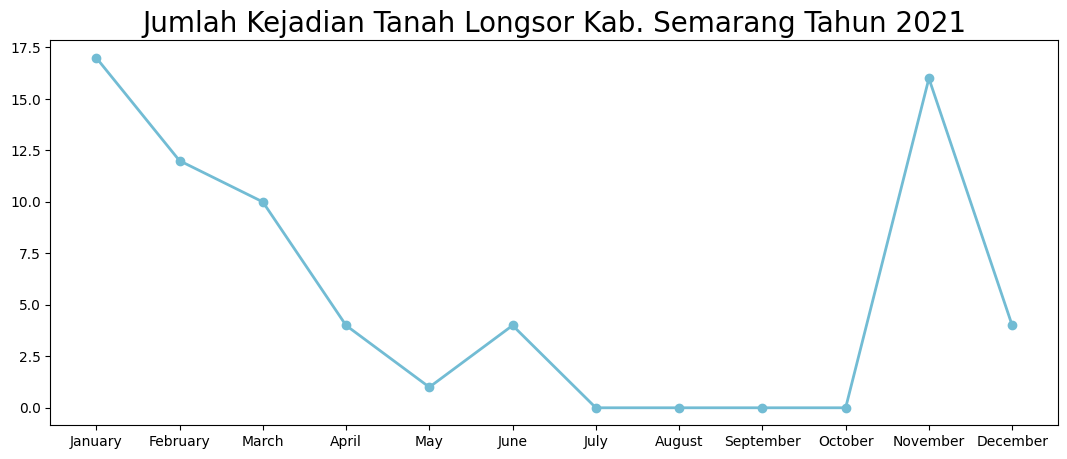

In [126]:
plt.figure(figsize=(13, 5))
plt.plot(
    rekap_ts["Bulan"],
    rekap_ts["Jumlah Kejadian Bencana"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title(f'Jumlah Kejadian Tanah Longsor Kab. Semarang Tahun {selected_year}', loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Musim

In [127]:
selected_year = 2022
df_rekap_selected_year = all_rekap[all_rekap.TAHUN == selected_year]
df_rekap_selected_year

,NO,JENIS_BENCANA,TANGGAL_KEJADIAN,PELAPOR,KECAMATAN,MUSIM,TAHUN
68,4,TANAH LONGSOR,2022-01-06,WHATSAPP GROUP,UNGARAN BARAT,PENGHUJAN,2022
69,5,TANAH LONGSOR,2022-01-06,WHATSAPP GROUP,UNGARAN BARAT,PENGHUJAN,2022
70,8,TANAH LONGSOR,2022-01-10,WHATSAPP GROUP,UNGARAN TIMUR,PENGHUJAN,2022
71,12,TANAH LONGSOR,2022-01-11,WHATSAPP GROUP,SUMOWONO,PENGHUJAN,2022
72,13,TANAH LONGSOR,2022-01-11,WHATSAPP GROUP,SUMOWONO,PENGHUJAN,2022
...,...,...,...,...,...,...,...
175,273,TANAH LONGSOR,2022-11-27,WHATSAPP GROUP,JAMBU,PENGHUJAN,2022
176,274,TANAH LONGSOR,2022-11-28,SURAT KEPALA DAERAH,BANCAK,PENGHUJAN,2022
177,279,TANAH LONGSOR,2022-11-30,WHATSAPP GROUP,UNGARAN TIMUR,PENGHUJAN,2022
178,283,TANAH LONGSOR,2022-12-13,INSTANSI TERKAIT & MASYARAKAT,UNGARAN TIMUR,PENGHUJAN,2022


In [128]:
#MUSIM
rekap_musim = df_rekap_selected_year.groupby(by="MUSIM").NO.nunique().reset_index()
rekap_musim.rename(columns={
    "NO": "Jumlah Kejadian Bencana"
}, inplace=True)
rekap_musim

,MUSIM,Jumlah Kejadian Bencana
0,KEMARAU,46
1,PENGHUJAN,66


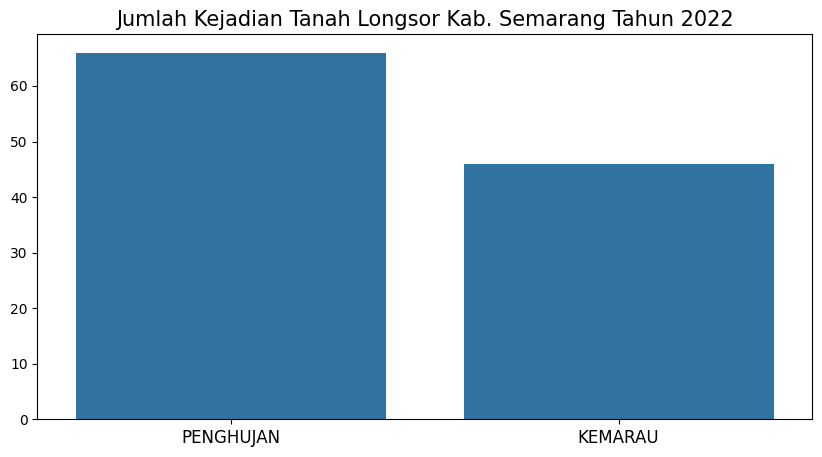

In [129]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="Jumlah Kejadian Bencana",
    x="MUSIM",
    data=rekap_musim.sort_values(by="Jumlah Kejadian Bencana", ascending=False),
)
plt.title(f'Jumlah Kejadian Tanah Longsor Kab. Semarang Tahun {selected_year}', loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pelaporan

In [130]:
selected_year = 2023
df_rekap_selected_year = all_rekap[all_rekap.TAHUN == selected_year]
df_rekap_selected_year

,NO,JENIS_BENCANA,TANGGAL_KEJADIAN,PELAPOR,KECAMATAN,MUSIM,TAHUN
180,3,TANAH LONGSOR,2023-01-04,WHATSAPP GROUP,SUMOWONO,PENGHUJAN,2023
181,4,TANAH LONGSOR,2023-01-04,WHATSAPP GROUP,AMBARAWA,PENGHUJAN,2023
182,5,TANAH LONGSOR,2023-01-04,WHATSAPP GROUP,SUMOWONO,PENGHUJAN,2023
183,6,TANAH LONGSOR,2023-01-04,WHATSAPP GROUP,BANDUNGAN,PENGHUJAN,2023
184,8,TANAH LONGSOR,2023-01-04,WHATSAPP GROUP,UNGARAN BARAT,PENGHUJAN,2023
...,...,...,...,...,...,...,...
306,579,TANAH LONGSOR,2023-11-29,WHATSAPP GROUP,BAWEN,PENGHUJAN,2023
307,581,TANAH LONGSOR,2023-11-30,WHATSAPP GROUP,BAWEN,PENGHUJAN,2023
308,582,TANAH LONGSOR,2023-12-01,WHATSAPP GROUP,SUMOWONO,PENGHUJAN,2023
309,584,TANAH LONGSOR,2023-12-04,WHATSAPP GROUP,GETASAN,PENGHUJAN,2023


In [131]:
#MUSIM
rekap_lapor = df_rekap_selected_year.groupby(by="PELAPOR").NO.nunique().reset_index()
rekap_lapor.rename(columns={
    "NO": "Jumlah Kejadian Bencana"
}, inplace=True)
rekap_lapor

,PELAPOR,Jumlah Kejadian Bencana
0,INSTANSI TERKAIT & MASYARAKAT,6
1,SURAT KEPALA DAERAH,11
2,WHATSAPP GROUP,114


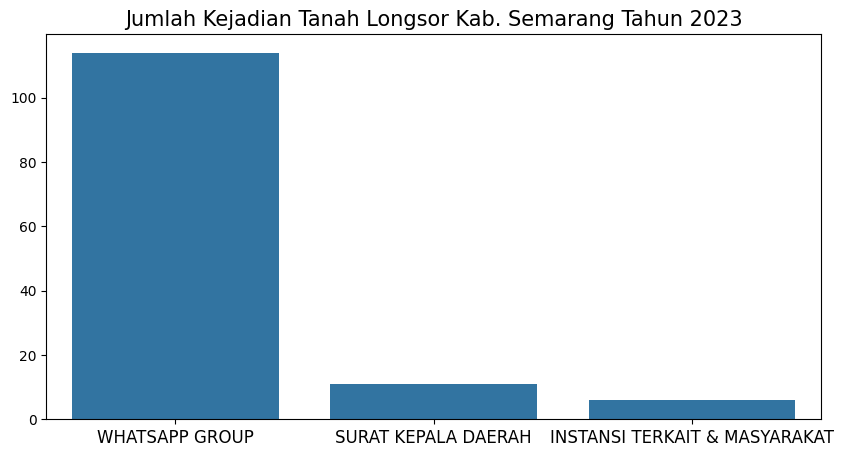

In [132]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="Jumlah Kejadian Bencana",
    x="PELAPOR",
    data=rekap_lapor.sort_values(by="Jumlah Kejadian Bencana", ascending=False),
)
plt.title(f'Jumlah Kejadian Tanah Longsor Kab. Semarang Tahun {selected_year}', loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Sebaran

In [133]:
selected_year = 2021
df_peta_selected_year = all_peta[all_peta.TAHUN == selected_year]
df_peta_selected_year

,wadmkk,namaobj,luas_ha,geometry,KECAMATAN,KEJADIAN,TAHUN
0,Semarang,AMBARAWA,2978.003567,"POLYGON ((110.40053 -7.23260, 110.40072 -7.232...",AMBARAWA,2,2021
1,Semarang,BANCAK,4547.673893,"POLYGON ((110.61242 -7.21503, 110.61244 -7.215...",BANCAK,1,2021
2,Semarang,BANDUNGAN,4739.591056,"POLYGON ((110.34942 -7.18484, 110.34943 -7.184...",BANDUNGAN,7,2021
3,Semarang,BANYUBIRU,5172.053686,"POLYGON ((110.40008 -7.28285, 110.40010 -7.283...",BANYUBIRU,7,2021
4,Semarang,BAWEN,4695.655168,"POLYGON ((110.46235 -7.20863, 110.46304 -7.208...",BAWEN,5,2021
5,Semarang,BERGAS,4573.534034,"POLYGON ((110.46678 -7.12917, 110.46706 -7.129...",BERGAS,2,2021
6,Semarang,BRINGIN,6818.389564,"POLYGON ((110.54524 -7.18330, 110.54522 -7.183...",BRINGIN,3,2021
7,Semarang,GETASAN,6808.129602,"POLYGON ((110.45381 -7.33846, 110.45390 -7.338...",GETASAN,4,2021
8,Semarang,JAMBU,5202.636434,"POLYGON ((110.32852 -7.24879, 110.32931 -7.249...",JAMBU,12,2021
9,Semarang,KALIWUNGU,3104.078004,"POLYGON ((110.59228 -7.44008, 110.59248 -7.440...",KALIWUNGU,1,2021


In [134]:
fig = px.choropleth(df_peta_selected_year,
                   geojson=df_peta_selected_year.geometry,
                   locations=df_peta_selected_year.index,
                   color="KEJADIAN",
                    color_continuous_scale='Reds',
                    range_color=(0, max(df_peta_selected_year.KEJADIAN)),
                    hover_data='KECAMATAN',
                    labels={'KEJADIAN':'KEJADIAN'})
fig.update_geos(fitbounds="locations", visible=False)
fig.show()